# Segmentasi Pelanggan Retail Menggunakan Teknik Clustering

- **Nama: Nasywa Aulia Putri**
- **NIM: 23/512797/PA/21905**

# Pendahuluan

Dalam era digital saat ini, industri retail mengalami pertumbuhan yang sangat pesat seiring dengan meningkatnya kebutuhan konsumen dan kemudahan akses terhadap produk melalui platform daring maupun fisik. Seiring dengan itu, perusahaan retail mengumpulkan sejumlah besar data transaksi yang mengandung berbagai informasi penting seperti usia pelanggan, kategori produk yang dibeli, hingga total pengeluaran yang dilakukan dalam satu transaksi. Namun, banyak dari data ini belum dimanfaatkan secara optimal untuk mendukung pengambilan keputusan strategis, seperti memahami perilaku pelanggan, menentukan strategi pemasaran, hingga meningkatkan efisiensi penjualan.

Salah satu pendekatan yang dapat digunakan untuk menggali pola tersembunyi dalam data tersebut adalah melalui teknik unsupervised learning, khususnya metode clustering. Dalam studi kasus ini, data transaksi pelanggan yang mencakup informasi tanggal transaksi, usia pelanggan, kategori produk (seperti Elektronik, Pakaian, dan Produk Kecantikan), kuantitas, total pengeluaran dianalisis untuk menemukan kelompok pelanggan yang memiliki karakteristik serupa. Dengan membentuk klaster pelanggan berdasarkan pola pembelian dan demografi, perusahaan retail dapat menyusun strategi yang lebih personal dan tepat sasaran, seperti pemberian diskon khusus, rekomendasi produk, dan kampanye pemasaran yang lebih terfokus. Pendekatan ini tidak hanya meningkatkan kepuasan pelanggan tetapi juga berkontribusi terhadap peningkatan pendapatan dan loyalitas pelanggan dalam jangka panjang.

# Data

Dataset yang digunakan dalam tugas ini bersumber dari repositori publik Kaggle berjudul “Retail Sales Dataset” dan dapat diakses melalui tautan berikut:

🔗 https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset \
🔗 https://bit.ly/21905_RetailSalesDataset

Dataset ini merupakan gambaran fiktif dari lanskap retail yang mencakup ribuan baris data transaksi pelanggan dari sebuah platform retail. Data ini tidak memiliki label atau target klasifikasi, sehingga sangat sesuai untuk pendekatan *unsupervised learning*, khususnya metode *clustering*. Dataset ini mencakup atribut-atribut penting seperti Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, dan Total Amount. Atribut-atribut ini memungkinkan eksplorasi mendalam terhadap tren penjualan, pengaruh demografis, dan perilaku pembelian pelanggan.

**Deskripsi Variabel yang Digunakan:** \
Dalam analisis ini, lima variabel utama dipilih karena relevansinya untuk segmentasi pelanggan, yaitu:
1. **Date**: Tanggal terjadinya transaksi untuk memberikan wawasan tentang tren penjualan dari waktu ke waktu.
2. **Age**: Usia pelanggan yang melakukan transaksi. Variabel ini bersifat numerik dan digunakan untuk mengelompokkan pelanggan berdasarkan segmen usia sehingga memungkinkan analisis pola pembelian berdasarkan kelompok umur.
3. **Product Category**: Kategori produk yang dibeli pelanggan, seperti *Electronics*, *Clothing*, dan *Beauty*. Variabel ini bersifat kategorikal dan membantu mengidentifikasi preferensi produk pelanggan yang dapat mengungkap tren pembelian spesifik pada setiap segmen.
4. **Quantity**: Jumlah unit produk yang dibeli untuk memberikan kontribusi terhadap wawasan tentang volume pembelian.
5. **Total Amount (£)**: Jumlah total uang yang dibelanjakan dalam satu transaksi. Variabel ini bersifat numerik dan digunakan untuk mengevaluasi daya beli pelanggan dalam setiap klaster untuk memberikan wawasan tentang nilai transaksi dan potensi pendapatan.


Dataset ini memiliki lebih dari 1000 baris data dan telah melalui proses pembersihan untuk memastikan kualitas analisis yang dihasilkan. Kelima variabel tersebut digunakan untuk membentuk klaster pelanggan berdasarkan karakteristik demografis dan perilaku pembelian mereka.

In [ ]:
import pandas as pd
data = pd.read_csv('retail_sales_dataset.csv')
data = data.iloc[:, [1, 4, 5, 6, 8]]
data

,Date,Age,Product Category,Quantity,Total Amount
0,2023-11-24,34,Beauty,3,150
1,2023-02-27,26,Clothing,2,1000
2,2023-01-13,50,Electronics,1,30
3,2023-05-21,37,Clothing,1,500
4,2023-05-06,30,Beauty,2,100
...,...,...,...,...,...
995,2023-05-16,62,Clothing,1,50
996,2023-11-17,52,Beauty,3,90
997,2023-10-29,23,Beauty,4,100
998,2023-12-05,36,Electronics,3,150


# Metodologi

## 1. Data Preprocessing dan Feature Engineering

Sebelum melakukan clustering, data numerik dilakukan scaling menggunakan MinMaxScaler agar semua fitur berada pada skala yang sama. Variabel kategorikal diubah menjadi representasi numerik dengan menggunakan One-Hot Encoding. Selain itu, fitur baru seperti bulan transaksi, kelompok usia, dan tingkat pengeluaran juga ditambahkan untuk memperkaya informasi yang digunakan dalam analisis segmentasi pelanggan.

---

## 2. Reduksi Dimensi dengan Principal Component Analysis (PCA)

Dimensionality reduction adalah teknik dalam machine learning yang digunakan untuk mengurangi jumlah fitur (dimensi) dalam dataset sembari mempertahankan sebanyak mungkin informasi yang relevan. Ini dilakukan agar model menjadi lebih efisien, cepat, dan mudah divisualisasikan.

Salah satu metode paling umum adalah Principal Component Analysis (PCA) yang mentransformasikan fitur asli menjadi komponen-komponen utama yang saling ortogonal dan mengandung variansi terbesar dalam data.

### Principal Component Analysis (PCA)

**PCA** adalah teknik **reduksi dimensi linier** yang mengubah fitur asli menjadi komponen ortogonal yang mempertahankan variansi maksimum data atau memproyeksikan data ke dalam ruang baru dengan variansi terbesar untuk menjaga informasi sebanyak mungkin.

#### Langkah-Langkah:
- Standarisasi data numerik.
- Perhitungan matriks kovarians.
- Ekstraksi eigenvalue dan eigenvector.
- Pemilihan komponen utama berdasarkan akumulasi variansi.
- Transformasi data ke ruang dimensi lebih rendah.

### Rumus Komponen:
$Z = X W$
* $Z$: data terproyeksi
* $X$: data asli
* $W$: matriks eigenvector

### Kelebihan:
- Mengurangi dimensi tanpa kehilangan informasi yang signifikan.
- Mengatasi multikolinearitas antar fitur.
- Meningkatkan efisiensi model dan mempermudah visualisasi.

### Kekurangan:
- Hanya menangkap pola linier.
- Komponen hasil transformasi sulit diinterpretasikan.
- Peka terhadap skala fitur, sehingga perlu normalisasi terlebih dahulu.

---

## 3. Penggabungan Fitur Numerik dan Kategorikal

Setelah reduksi dimensi numerik, hasil PCA digabungkan kembali dengan fitur kategorikal yang sudah di-One-Hot Encoding. Hasil gabungan ini menjadi input akhir untuk algoritma clustering, sehingga model dapat menggunakan informasi numerik yang direduksi serta variabel kategorikal secara bersamaan.

---

## 4. Clustering

Empat metode clustering digunakan untuk mengelompokkan data berdasarkan fitur gabungan tersebut:

### 4.1 K-Means Clustering

**K-Means** adalah metode *partitional clustering* berbasis centroid yang membagi data menjadi *K* klaster berdasarkan jarak ke pusat klaster (centroid), dengan tujuan meminimalkan total kuadrat jarak antar titik dengan centroid-nya (disebut SSE - Sum of Squared Errors). Algoritma ini iteratif dan sangat efisien untuk data berukuran besar.

#### Langkah-Langkah:
1. Tentukan jumlah klaster *K* dan inisialisasi centroid secara acak.
2. Hitung jarak setiap titik ke semua centroid dan tetapkan ke klaster dengan centroid terdekat.
3. Hitung ulang posisi centroid dengan menghitung rata-rata dari semua titik dalam klaster.
4. Ulangi proses hingga centroid tidak berubah atau jumlah iterasi maksimum tercapai.

#### Rumus SSE:

$SSE = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

* $C_i$: klaster ke-i
* $\mu_i$: centroid dari klaster ke-i

#### Kelebihan:
- Sederhana dan cepat diterapkan pada data besar.
- Efisien dan praktis dalam banyak kasus.
- Bekerja baik pada data yang *spherical* dan seragam ukurannya.

#### Kekurangan:
- Tidak efektif untuk klaster berbentuk tidak beraturan.
- Sensitif terhadap titik awal (optimum lokal).
- Rentan terhadap *outlier*.
- Harus menentukan *K* di awal.

#### Penentuan K:
- **Elbow Method**: mencari titik dimana penurunan SSE melambat.
- **Silhouette Score**: mengevaluasi seberapa baik titik cocok dengan klasternya.

---

### 4.2 DBSCAN (Density-Based Spatial Clustering)

**DBSCAN** adalah metode *density-based clustering* yang mengelompokkan data berdasarkan kepadatan titik, bukan jarak ke centroid. DBSCAN mengenali tiga jenis titik: **core point**, **border point**, dan **noise**.

#### Terminologi:
- **Core point**: Titik dengan jumlah tetangga ≥ MinPts dalam radius Eps.
- **Border point**: Titik dalam radius Eps dari core, tapi bukan core.
- **Noise point**: Bukan core maupun border.

#### Parameter Utama:
- $\varepsilon$: radius maksimum tetangga.
- *min\_samples*: jumlah minimum tetangga agar sebuah titik menjadi core point.

#### Langkah-Langkah:
1. Mulai dari titik acak, cari tetangga dalam radius $\varepsilon$.
2. Jika tetangga $\geq$ *min\_samples*, maka titik menjadi **core** dan membentuk klaster.
3. Tetangga dari core point diperluas.
4. Titik yang tidak memenuhi syarat dianggap **noise**.
5. Singkirkan titik noise.
6. Bentuk klaster dari core yang saling terhubung (≤ Eps).
7. Tambahkan border point ke klaster core terdekat.

#### Kelebihan:
- Tidak perlu menentukan jumlah klaster.
- Dapat menemukan bentuk klaster arbitrer.
- Tahan terhadap *noise* dan *outlier*.

#### Kekurangan:
- Sulit menentukan Eps dan MinPts secara optimal.
- Tidak cocok jika kerapatan klaster sangat berbeda.
- Performa menurun pada data berdimensi tinggi (*curse of dimensionality*).

---

### 4.3 Agglomerative Hierarchical Clustering

**Agglomerative Clustering** adalah pendekatan *bottom-up*, dimulai dengan setiap titik sebagai klaster sendiri lalu menggabungkan klaster terdekat secara bertahap dalam bentuk dendrogram.

#### Linkage Methods:
- **Single linkage**: jarak terdekat antar anggota klaster.
- **Complete linkage**: jarak terjauh antar anggota klaster. Pada tugas ini akan menggunakan complete linkage.
- **Average linkage**: rata-rata jarak antar anggota.
- **Ward**: meminimalkan variansi dalam klaster.

#### Langkah-Langkah:
1. Anggap setiap titik sebagai klaster individual.
2. Gabungkan dua klaster dengan jarak terkecil.
3. Perbarui matriks jarak sesuai metode linkage (single, complete, average, ward).
4. Ulangi hingga tersisa satu klaster atau memenuhi kriteria penghentian.

#### Kelebihan:
- Tidak perlu menentukan jumlah klaster di awal.
- Dapat digunakan untuk membentuk struktur hierarkis.
- Hasil dapat divisualisasi sebagai dendrogram.

#### Kekurangan:
- Tidak bisa mengubah penggabungan yang salah (final).
- Rentan terhadap *noise* dan *outlier*.
- Waktu komputasi tinggi (hingga O(n³)).

---

### 4.4 Gaussian Mixture Model (GMM)

**GMM** adalah pendekatan clustering *probabilistik* di mana setiap titik data memiliki kemungkinan berada dalam beberapa klaster. Data diasumsikan berasal dari campuran distribusi Gaussian.

#### Estimasi Parameter dengan Expectation–Maximization (EM):
1. **Inisialisasi**: Pilih jumlah klaster *K*, inisialisasi parameter μ, Σ, dan π.
2. **E-step**: Hitung probabilitas tanggung jawab (responsibility) $\gamma_{ik}$ untuk setiap titik terhadap tiap klaster.
3. **M-step**: Perbarui $\mu_k, \Sigma_k, \pi_k$ berdasarkan $\gamma$.
4. **Iterasi** hingga konvergen (likelihood stabil).

#### Kelebihan:
- Dapat menangkap bentuk klaster elips atau tidak simetris.
- Clustering bersifat *soft* (probabilistik).
- Dapat mendeteksi *outlier* berdasarkan probabilitas rendah.

#### Kekurangan:
- Jumlah klaster *K* harus ditentukan di awal.
- Lambat untuk dataset besar.
- Rentan terhadap inisialisasi buruk.
- Estimasi kovarians bisa *singular*.

---

## 5. Evaluasi Model Clustering

Setiap model dievaluasi menggunakan metrik:

- **Silhouette Score**: Mengukur kesesuaian titik dalam klaster.
- **Davies-Bouldin Index**: Mengukur kesamaan antar klaster (semakin rendah semakin baik).
- **Calinski-Harabasz Index**: Mengukur rasio variansi antar dan dalam klaster.
- **Dunn Index**: Mengukur rasio jarak minimum antar klaster terhadap diameter maksimum dalam klaster.

Model terbaik dipilih berdasarkan peringkat gabungan keempat metrik tersebut.

---

## 6. Profiling dan Interpretasi Klaster

Setelah memilih model terbaik (dalam kasus ini K-Means dengan PCA), dilakukan profil klaster dengan langkah:

- Melakukan inverse transform PCA untuk mengembalikan data numerik ke skala asli.
- Menggabungkan data hasil inverse transform dengan fitur kategorikal asli dan label klaster.
- Menghitung statistik deskriptif (mean, min, max) untuk fitur numerik dan modus untuk fitur kategorikal per klaster.
- Membuat visualisasi boxplot untuk fitur numerik dan countplot untuk fitur kategorikal berdasarkan klaster.
- Melakukan interpretasi karakteristik tiap klaster berdasarkan hasil agregasi dan visualisasi tersebut.

## Clustering

Clustering adalah metode unsupervised learning yang bertujuan untuk mengelompokkan data ke dalam beberapa grup (cluster) berdasarkan kemiripan tertentu. Tidak seperti klasifikasi, clustering tidak memiliki label; model hanya menemukan struktur alami dalam data

**Algoritma Clustering yang Digunakan:**
1. K-Means Clustering
    - Mengelompokkan data ke dalam K klaster berdasarkan minimisasi jarak ke pusat (centroid).
    - Cocok untuk data numerik dan bentuk klaster bulat (spherical).
    - Rentan terhadap outlier dan membutuhkan inisialisasi jumlah klaster.
2. DBSCAN
    - Mengelompokkan berdasarkan kerapatan (density).
    - Tidak perlu menentukan jumlah klaster.
    - Tahan terhadap noise, tapi sensitif terhadap parameter eps dan `min_samples`.
3. Agglomerative Hierarchical Clustering
    - Menggabungkan data secara bertahap membentuk dendrogram.
    - Tidak perlu menentukan K sejak awal, tapi bisa dipotong dendrogram-nya.
4. Gaussian Mixture Model (GMM)
    - Clustering probabilistik berbasis distribusi Gaussian.
    - Menyediakan soft clustering (probabilitas keanggotaan).


# Prepemrosesan Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pertama, cari tahu berbagai informasi dari dataset yang digunakan.

In [3]:
data.shape

(1000, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Product Category  1000 non-null   object
 3   Quantity          1000 non-null   int64 
 4   Total Amount      1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [5]:
data.head(5)

,Date,Age,Product Category,Quantity,Total Amount
0,2023-11-24,34,Beauty,3,150
1,2023-02-27,26,Clothing,2,1000
2,2023-01-13,50,Electronics,1,30
3,2023-05-21,37,Clothing,1,500
4,2023-05-06,30,Beauty,2,100


In [6]:
data.columns

Index(['Date', 'Age', 'Product Category', 'Quantity', 'Total Amount'], dtype='object')

Ubah nama kolomnya untuk standarisasi dan mempermudah penanganan nama kolom dalam proses analisis data.

In [7]:
new_colnames = []
for col in data.columns:
    new_colnames.append(col.replace(' ', '_').lower())
data.columns = new_colnames

Kemudian, lihat kembali datanya setelah diubah nama kolomnya/variabelnya.

In [8]:
data

,date,age,product_category,quantity,total_amount
0,2023-11-24,34,Beauty,3,150
1,2023-02-27,26,Clothing,2,1000
2,2023-01-13,50,Electronics,1,30
3,2023-05-21,37,Clothing,1,500
4,2023-05-06,30,Beauty,2,100
...,...,...,...,...,...
995,2023-05-16,62,Clothing,1,50
996,2023-11-17,52,Beauty,3,90
997,2023-10-29,23,Beauty,4,100
998,2023-12-05,36,Electronics,3,150


Cek missing value pada tiap variabel.

In [9]:
print(data.isnull().sum())

date                0
age                 0
product_category    0
quantity            0
total_amount        0
dtype: int64


Diperoleh seluruh variabel tidak mengandung missing value. Jadi, tidak perlu dilakukan penanganan apapun.

Selanjutnya, ubah format variabel "date".

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data

,date,age,product_category,quantity,total_amount
0,2023-11-24,34,Beauty,3,150
1,2023-02-27,26,Clothing,2,1000
2,2023-01-13,50,Electronics,1,30
3,2023-05-21,37,Clothing,1,500
4,2023-05-06,30,Beauty,2,100
...,...,...,...,...,...
995,2023-05-16,62,Clothing,1,50
996,2023-11-17,52,Beauty,3,90
997,2023-10-29,23,Beauty,4,100
998,2023-12-05,36,Electronics,3,150


Kemudian, tambahkan fitur-fitur baru dalam data.

### Fitur 1: Bulan

In [12]:
data['month'] = data['date'].dt.month

In [13]:
month_dico = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',
              8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [14]:
data['month'] = data['month'].replace(month_dico)

In [15]:
# Hitung jumlah transaksi per bulan (dalam bentuk nama bulan)
value_counts = data['month'].value_counts()

# Urutan bulan yang benar
bulan_urut = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

# Urutkan value_counts berdasarkan urutan bulan
sorted_month_counts = value_counts.reindex(bulan_urut)

# Tampilkan hasilnya
print(sorted_month_counts)

month
January       78
February      85
March         73
April         86
May          105
June          77
July          72
August        94
September     65
October       96
November      78
December      91
Name: count, dtype: int64


### Fitur 2: Total per Unit

In [16]:
data['total_per_unit'] = data['total_amount'] / data['quantity']

### Fitur 3: Pengelompokan Umur

In [17]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

### Fitur 4: Spending Level

In [18]:
def categorize_spending(total_amount):
    if total_amount < 100:
        return 'Low'
    elif total_amount < 300:
        return 'Medium'
    else:
        return 'High'
    
data['spending_level'] = data['total_amount'].apply(categorize_spending)

Berikut data hasil penambahan 4 fitur baru.

In [19]:
data

,date,age,product_category,quantity,total_amount,month,total_per_unit,age_group,spending_level
0,2023-11-24,34,Beauty,3,150,November,50.0,Dewasa,Medium
1,2023-02-27,26,Clothing,2,1000,February,500.0,Dewasa Muda,High
2,2023-01-13,50,Electronics,1,30,January,30.0,Paruh Baya,Low
3,2023-05-21,37,Clothing,1,500,May,500.0,Dewasa,High
4,2023-05-06,30,Beauty,2,100,May,50.0,Dewasa Muda,Medium
...,...,...,...,...,...,...,...,...,...
995,2023-05-16,62,Clothing,1,50,May,50.0,Lansia,Low
996,2023-11-17,52,Beauty,3,90,November,30.0,Paruh Baya,Low
997,2023-10-29,23,Beauty,4,100,October,25.0,Dewasa Muda,Medium
998,2023-12-05,36,Electronics,3,150,December,50.0,Dewasa,Medium


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1000 non-null   datetime64[ns]
 1   age               1000 non-null   int64         
 2   product_category  1000 non-null   object        
 3   quantity          1000 non-null   int64         
 4   total_amount      1000 non-null   int64         
 5   month             1000 non-null   object        
 6   total_per_unit    1000 non-null   float64       
 7   age_group         1000 non-null   category      
 8   spending_level    1000 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 63.8+ KB


# Hasil dan Pembahasan

## Exploratory Data Analysis (EDA)

Pada tahapan ini, Anda diwajibkan melakukan EDA minimal sebanyak 3 buah.

### Penjualan per Bulan

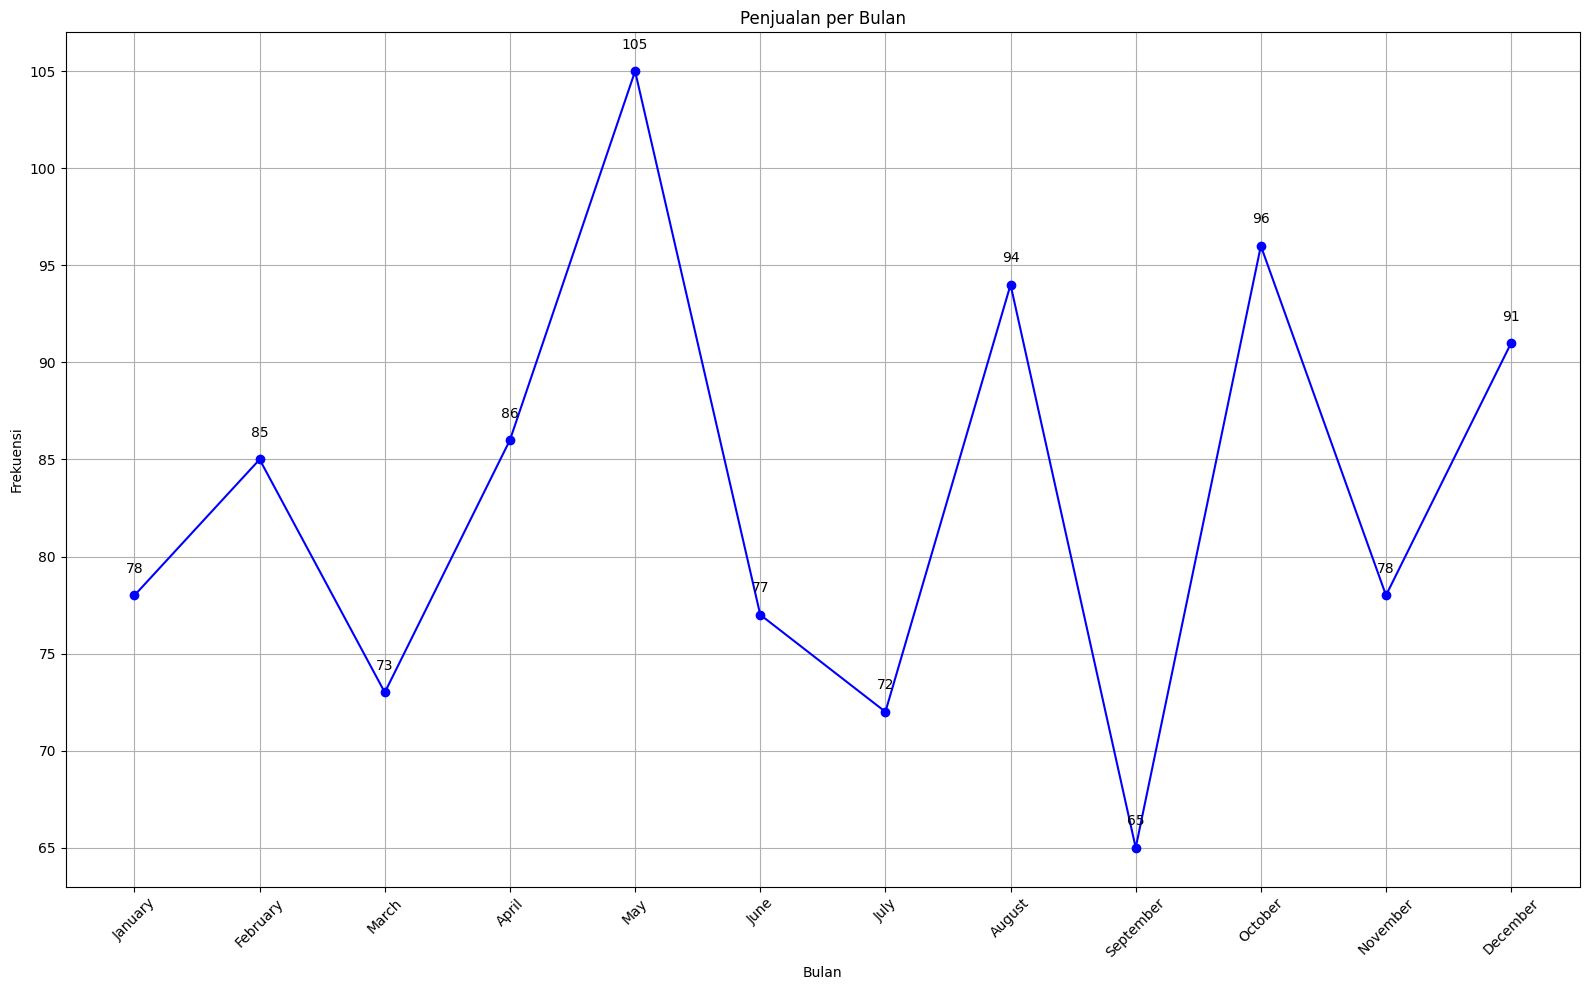

In [22]:
# Plot garis
plt.figure(figsize=(16, 10))
plt.plot(sorted_month_counts.index, sorted_month_counts.values, color='blue', marker='o')

# Tambahkan label kuantitas di setiap titik
for i, value in enumerate(sorted_month_counts.values):
    plt.text(x=i, y=value + 1, s=str(value), ha='center', va='bottom', fontsize=10)

# Label dan format
plt.ylabel('Frekuensi')
plt.xlabel('Bulan')
plt.title('Penjualan per Bulan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan *line plot* di atas, diperoleh informasi bahwa jumlah penjualan tertinggi terjadi pada bulan Mei ssebanyak 105 penjualan kemudian diikuti bulan Oktober sebanyak 96 penjualan dan penjualan terendah pada bulan September sebanyak 65 penjualan.

### Distribusi Kategori Usia

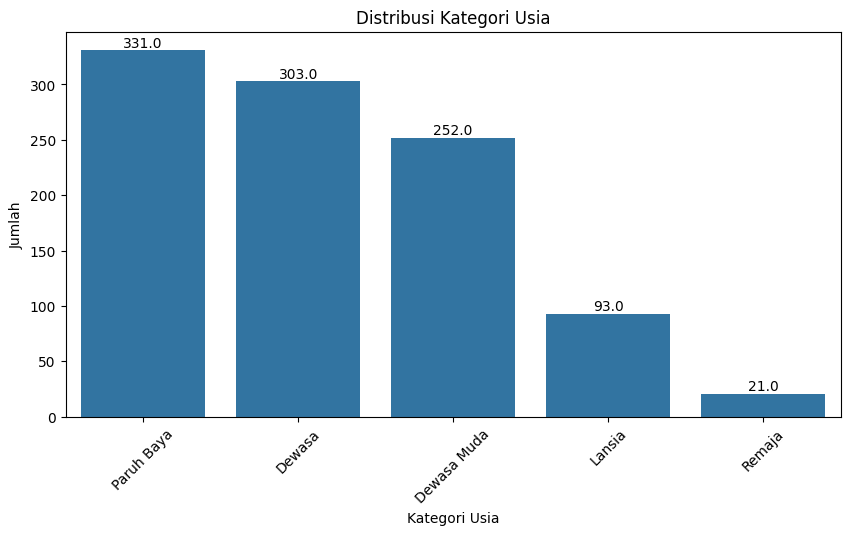

In [23]:
# Bar Chart
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='age_group', order=data['age_group'].value_counts().index)
plt.title('Distribusi Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')

# Menambahkan label pada setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan plot
plt.xticks(rotation=45)
plt.show()

Berdasarkan *bar chart* Distribusi Kategori Usia di atas, diperoleh informasi bahwa dari 1000 transaksi, kategori paruh baya menyumbang pembelian terbanyak sejumlah 331 transaksi lalu diikuti kategori dewasa, dewasa muda, lansia, dan yang terakhir kategori remaja sebanyak 21 transaksi.

### Pie Chart Kategori Produk

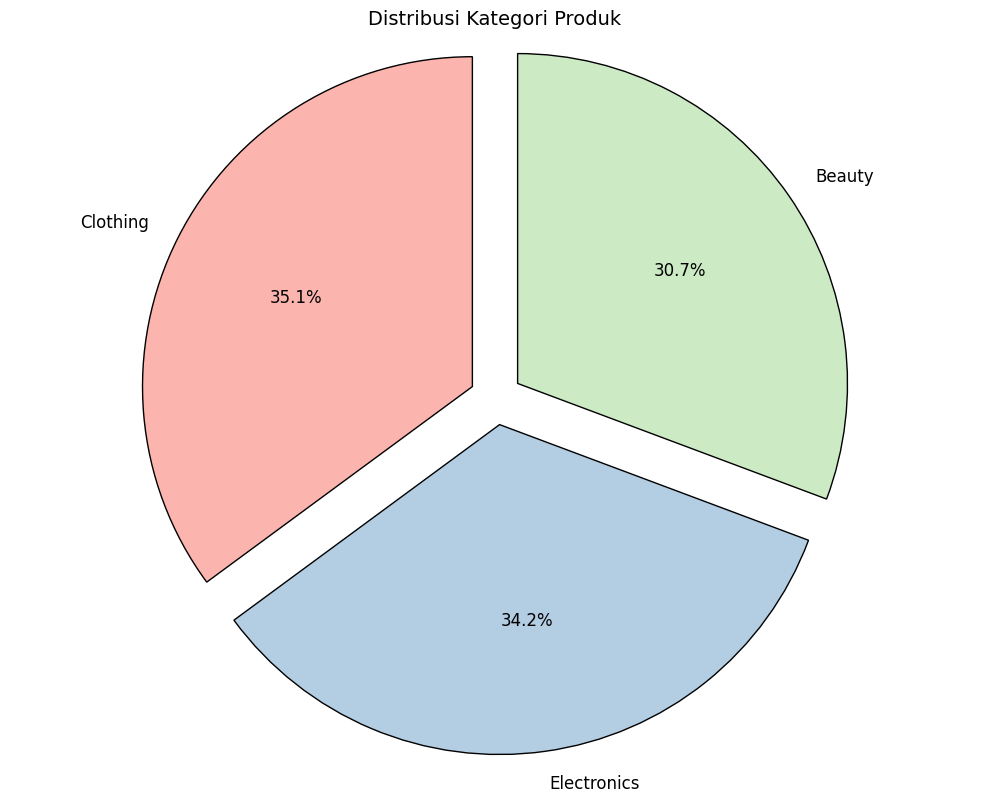

In [ ]:
# Hitung jumlah setiap kategori produk
product = data['product_category'].value_counts()

# Tentukan explode hanya untuk 3 kategori teratas
explode = [0.08 if i < 3 else 0 for i in range(len(product))]

# Warna yang lebih menarik
colors = plt.cm.Pastel1.colors

# Buat pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    product,
    labels=product.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    wedgeprops=dict(edgecolor='black'),
    textprops=dict(color="black", fontsize=12)
)

# Judul pie chart
ax.set_title('Distribusi Kategori Produk', fontsize=14)

# Buat pie bulat dan rapi
plt.axis('equal')
plt.tight_layout()
plt.show()

Berdasarkan *pie chart* Distribusi Kategori Produk di atas, diperoleh informasi bahwa jumlah pembelian masing-masing kategori produk hampir sama. Namun, yang paling banyak dibeli adalah kategori pakaian sebesar 35.1% dari total seluruh barang yang dibeli kemudian diikuti kategori barang elektronik sebesar 34.2% dan yang paling rendah adalah kategori kecantikan sebesar 30.7%.

### Rata-rata Pengeluaran per Kategori Usia

In [28]:
avg_spent_per_age_group = data.groupby('age_group').total_amount.mean().round(2)
avg_spent_per_age_group.to_frame()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1652\279169260.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spent_per_age_group = data.groupby('age_group').total_amount.mean().round(2)


,total_amount
age_group,
Remaja,534.05
Dewasa Muda,483.06
Dewasa,468.50
Paruh Baya,446.75
Lansia,357.26


C:\Users\Asus\AppData\Local\Temp\ipykernel_1652\1024644282.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_spent_per_age_group.index, rotation=45)


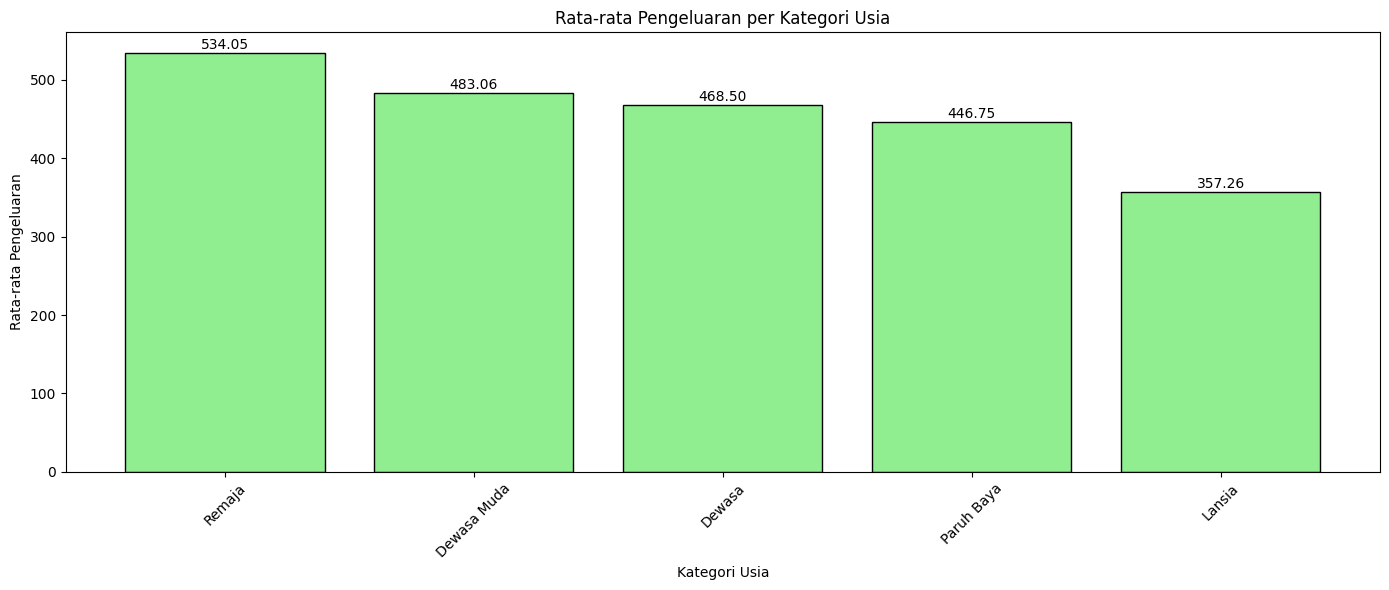

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# Plot batang
bars = ax.bar(x=avg_spent_per_age_group.index, height=avg_spent_per_age_group,
              color='lightgreen', edgecolor='black')

# Label sumbu dan judul
ax.set_xlabel('Kategori Usia')
ax.set_ylabel('Rata-rata Pengeluaran')
ax.set_title('Rata-rata Pengeluaran per Kategori Usia')
ax.set_xticklabels(avg_spent_per_age_group.index, rotation=45)

# Tambahkan label nilai di atas setiap batang
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Tampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan *bar chart* Rata-rata Pengeluaran per Kategori Usia di atas, diperoleh informasi bahwa kategori remaja memiliki rata-rata pengeluaran tertinggi, yaitu sebesar £534.05 lalu diikuti kategori dewasa muda, dewasa, paruh baya, dan terakhir kategori lansia, yaitu sebesar £357.26. Berdasarkan visualisasi distribusi kategori usia sebelumnya, kategori remaja merupakan kategori terendah yang melakukan transaksi dari total keseluruhan transaksi. Namun, dapat dilihat dari visualisasi rata-rata pengeluaran di atas, ternyata kategori remaja walaupun jumlah transaksinya paling sedikit, tetapi rata-rata pengeluarannya paling tinggi. Artinya, pembelian kategori remaja memang tidak sering, tetapi setiap transaksinya mengeluarkan banyak biaya.

### Rata-rata Jumlah Transaksi per Kategori Produk

In [30]:
avg_amount_per_product = data.groupby('product_category').total_amount.mean().round(2)
avg_amount_per_product.to_frame()

,total_amount
product_category,
Beauty,467.48
Clothing,443.25
Electronics,458.79


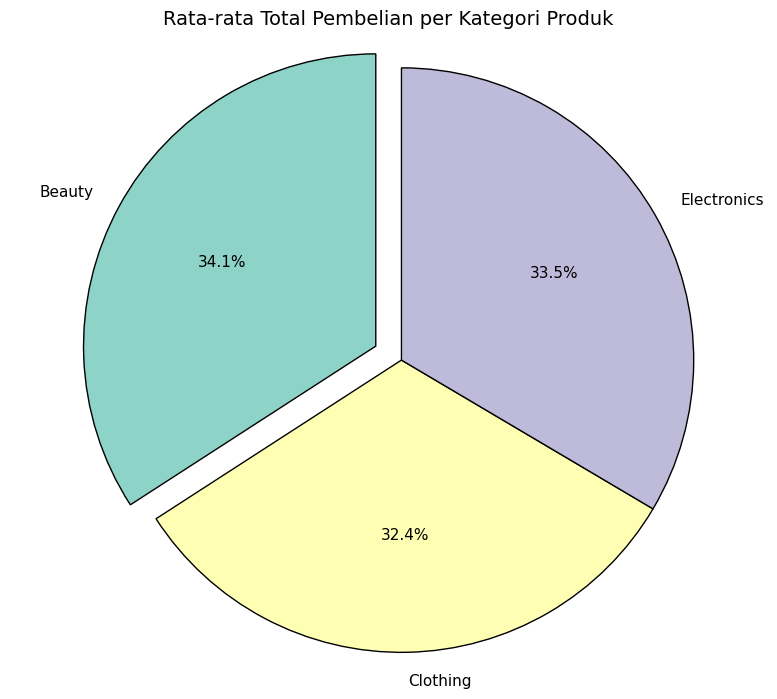

In [ ]:
# Menonjolkan kategori dengan nilai terbesar
explode = [0.1 if val == avg_amount_per_product.max() else 0 for val in avg_amount_per_product]

# Warna-warna menarik
colors = plt.cm.Set3.colors

# Buat pie chart yang menarik
fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(
    avg_amount_per_product,
    labels=avg_amount_per_product.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 11}
)

# Judul dan aspek rasio
ax.set_title('Rata-rata Total Pembelian per Kategori Produk', fontsize=14)
plt.axis('equal')  # Membuat bentuk pie tetap bulat
plt.tight_layout()
plt.show()

Berdasarkan *pie chart* Rata-rata Total Pembelian per Kategori Produk di atas, diperoleh informasi bahwa rata-rata pembelian masing-masing produk hampir sama. Namun, dapat diketahui bahwa kategori kecantikan menyumbang rata-rata pembelian tertinggi, yaitu sebesar 34.1% atau sebesar £467.48 kemudian diikuti kategori barang elektronik sebesar 33.5% atau £458.79 dan yang paling rendah adalah kategori pakaian sebesar 32.4% atau £443.25. Berdasarkan visualisasi *pie chart* terkait distribusi kuantitas pembelian masing-masing kategori, diperoleh bahwa kategori kecantikan memiliki kuantitas pembelian paling rendah, tetapi nyatanya kategori kecantikan menyumbang jumlah pembelian tertinggi. Artinya, harga barang-barang pada kategori kecantikan termasuk tinggi.

### Distribusi Spending Level Berdasarkan Variabel Numerik

In [34]:
numerical_features = ['age', 'quantity', 'total_amount', 'total_per_unit']

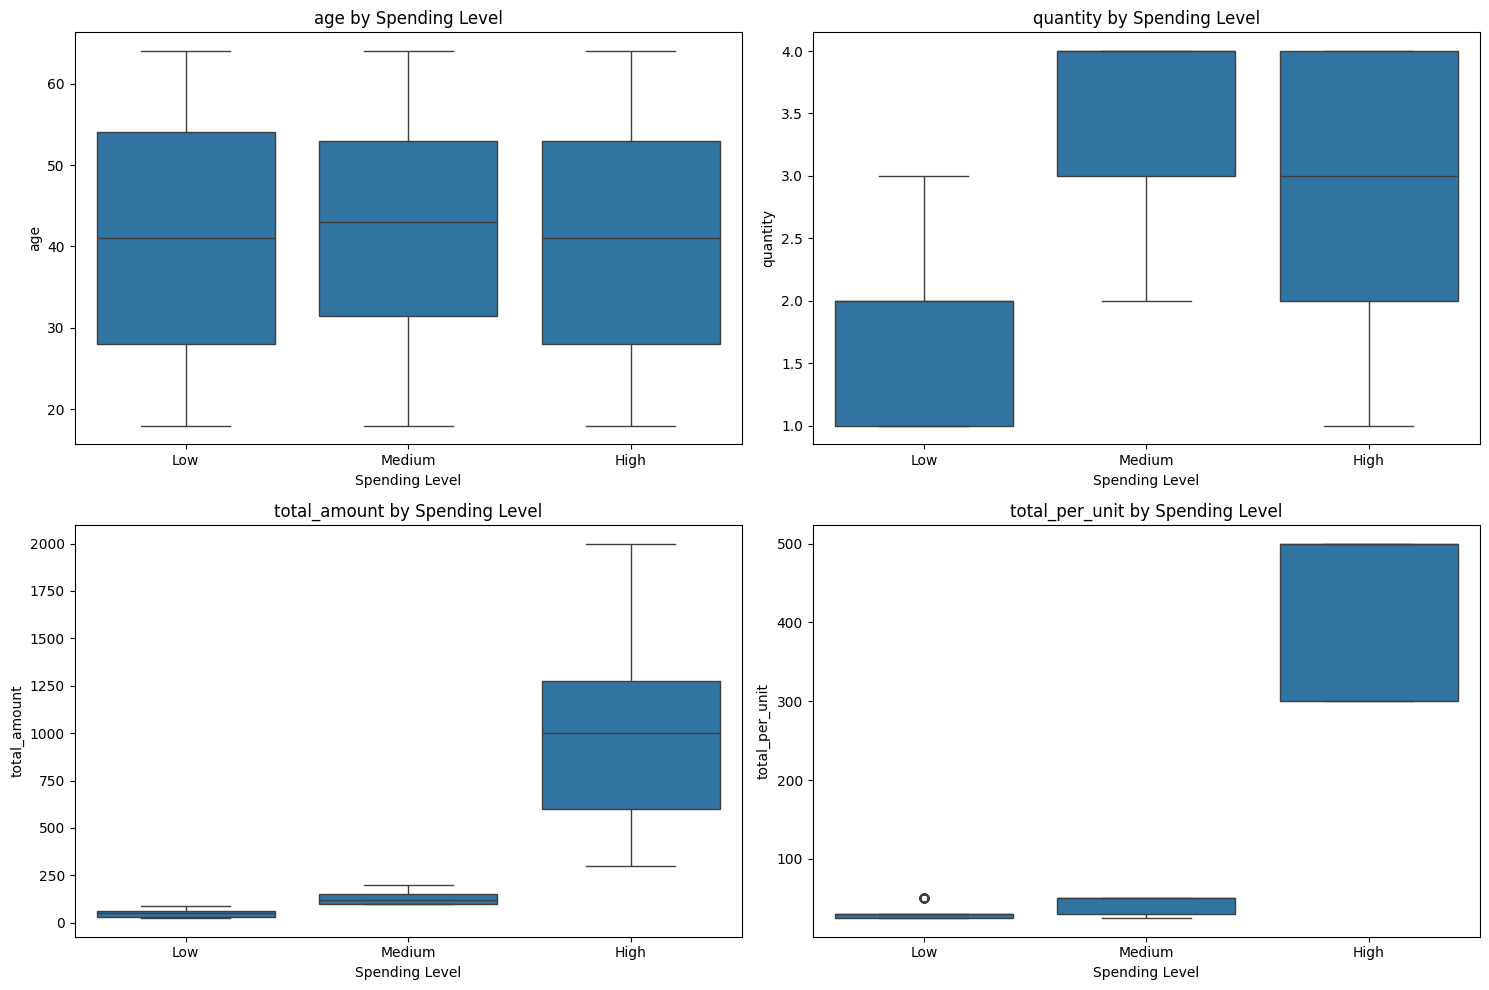

In [35]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='spending_level', y=feature, data=data, order=['Low', 'Medium', 'High'])
    plt.title(f'{feature} by Spending Level')
    plt.xlabel('Spending Level')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi *boxplot* yang diberikan, berikut adalah interpretasi dari hubungan antara fitur numerik (*age*, *quantity*, *total_amount*, *total_per_unit*) dengan *Spending Level* (Low, Medium, High):

**1. Age by Spending Level:**
* **Low Spending Level:** Rentang usia untuk tingkat pengeluaran rendah cukup luas, dengan median sekitar 40-an tahun. Distribusinya terlihat relatif simetris.
* **Medium Spending Level:** Rentang usia untuk tingkat pengeluaran menengah juga luas, dengan median yang mirip dengan tingkat pengeluaran rendah (sekitar 40-an tahun). Tampaknya tidak ada perbedaan signifikan dalam distribusi usia antara pelanggan dengan *spending level* rendah dan menengah.
* **High Spending Level:** Rentang usia untuk tingkat pengeluaran tinggi juga menunjukkan variasi yang serupa. Median usia juga berada di kisaran 40-an tahun.
* **Kesimpulan:** Berdasarkan *boxplot* ini, **usia pelanggan tampaknya tidak menjadi faktor pembeda yang kuat dalam menentukan tingkat pengeluaran (Spending Level)**. Pelanggan dari berbagai kelompok usia dapat ditemukan di ketiga kategori *spending level*.

**2. Quantity by Spending Level:**
* **Low Spending Level:** Pelanggan dengan tingkat pengeluaran rendah cenderung membeli kuantitas produk yang sedikit, dengan median sekitar 1-2 unit.
* **Medium Spending Level:** Pelanggan dengan tingkat pengeluaran menengah menunjukkan kuantitas pembelian yang lebih tinggi, dengan median sekitar 3-4 unit. Ada peningkatan yang jelas dibandingkan dengan tingkat pengeluaran rendah.
* **High Spending Level:** Pelanggan dengan tingkat pengeluaran tinggi juga membeli kuantitas yang lebih tinggi, dengan median yang mirip atau sedikit di atas tingkat pengeluaran menengah (sekitar 3-4 unit).
* **Kesimpulan:** **Kuantitas produk yang dibeli memiliki korelasi positif dengan tingkat pengeluaran.** Semakin banyak kuantitas yang dibeli, semakin tinggi kemungkinan pelanggan berada pada *spending level* menengah atau tinggi.

**3. Total Amount by Spending Level:**
* **Low Spending Level:** Jumlah total uang yang dibelanjakan untuk tingkat pengeluaran rendah sangat kecil, mayoritas di bawah £100. *Boxplot* ini menunjukkan bahwa data sangat terkonsentrasi di nilai yang sangat rendah.
* **Medium Spending Level:** Jumlah total uang yang dibelanjakan untuk tingkat pengeluaran menengah sedikit lebih tinggi dari tingkat rendah, namun masih relatif kecil, dengan median di bawah £200.
* **High Spending Level:** Terdapat perbedaan yang sangat mencolok pada tingkat pengeluaran tinggi. Jumlah total uang yang dibelanjakan jauh lebih besar, dengan median sekitar £750 - £1000, dan beberapa transaksi mencapai £2000.
* **Kesimpulan:** **"Total Amount" adalah indikator yang sangat kuat untuk *Spending Level*.** Ada perbedaan yang jelas dan signifikan dalam jumlah total uang yang dibelanjakan antara ketiga kategori *spending level*, terutama antara "Medium" dan "High".

**4. Total per Unit by Spending Level:**
* **Low Spending Level:** Harga per unit untuk tingkat pengeluaran rendah cenderung sangat rendah, sebagian besar di bawah £50, dengan beberapa *outlier* kecil.
* **Medium Spending Level:** Harga per unit untuk tingkat pengeluaran menengah juga relatif rendah, serupa dengan tingkat rendah, sebagian besar di bawah £50.
* **High Spending Level:** Terjadi peningkatan yang drastis pada harga per unit untuk tingkat pengeluaran tinggi. Median berada di atas £300, bahkan mendekati £400 - £500. Ini menunjukkan bahwa pelanggan dengan *spending level* tinggi cenderung membeli produk yang lebih mahal per unitnya.
* **Kesimpulan:** **"Total per Unit" juga merupakan faktor penting dalam membedakan *Spending Level*.** Pelanggan dengan *spending level* tinggi secara signifikan membeli produk dengan harga per unit yang jauh lebih mahal dibandingkan dengan pelanggan di *spending level* rendah dan menengah.

**Interpretasi Keseluruhan:**

Visualisasi ini menunjukkan bahwa **"Total Amount" dan "Total per Unit" adalah fitur numerik yang paling berpengaruh dalam membedakan antar *Spending Level***. Pelanggan dengan *spending level* "High" secara konsisten menunjukkan nilai "Total Amount" dan "Total per Unit" yang jauh lebih tinggi. "Quantity" juga menunjukkan perbedaan, di mana pembelian kuantitas yang lebih banyak berhubungan dengan *spending level* menengah dan tinggi. Sebaliknya, "Age" tampaknya bukan prediktor yang kuat untuk *Spending Level*.

Ini mengindikasikan bahwa untuk mengidentifikasi pelanggan dengan *spending level* tinggi, fokus harus diberikan pada nilai transaksi total dan harga per unit produk yang mereka beli, serta jumlah unit yang mereka beli. Usia pelanggan kurang relevan dalam segmentasi ini.

### Distribusi Spending Level Berdasarkan Variabel Kategorik

In [36]:
categorical_features = ['product_category', 'age_group']

<Figure size 1000x500 with 0 Axes>

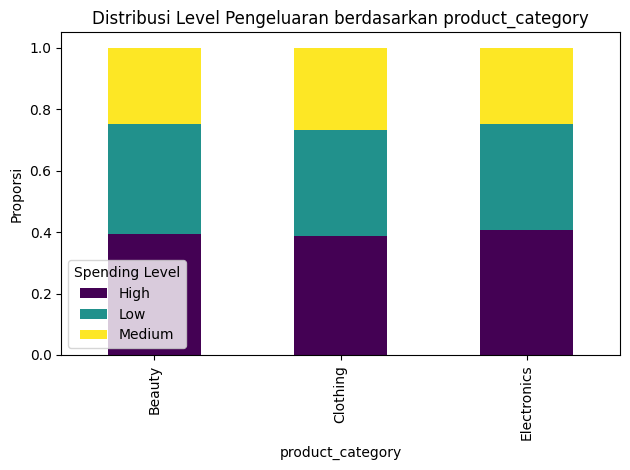

<Figure size 1000x500 with 0 Axes>

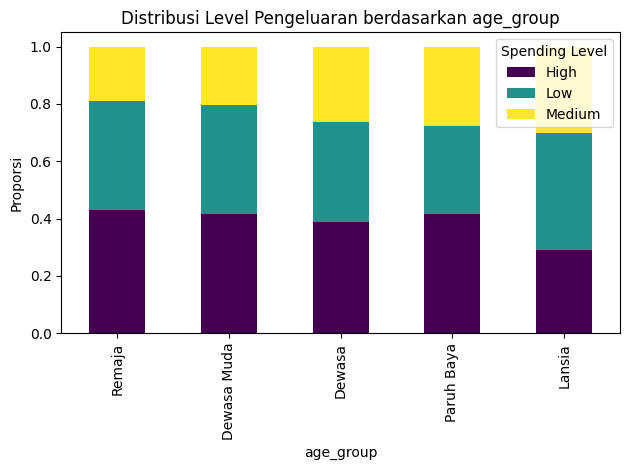

In [ ]:
# Buat list fitur kategorikal tanpa 'spending_level'
categorical_features = [col for col in categorical_features if col != 'spending_level']

# Plot stacked barplot untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    crosstab = pd.crosstab(data[feature], data['spending_level'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Distribusi Level Pengeluaran berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporsi')
    plt.legend(title='Spending Level')
    plt.tight_layout()
    plt.show()

Berikut adalah interpretasi dari visualisasi *stacked bar plot* yang menunjukkan distribusi *Spending Level* berdasarkan 'product_category' dan 'age_group':

**1. Distribusi Level Pengeluaran berdasarkan product_category**

Visualisasi ini menunjukkan proporsi *Spending Level* (High, Low, Medium) dalam setiap kategori produk ('Beauty', 'Clothing', 'Electronics').

* **Spending Level 'High' (Ungu Gelap):**
    * Proporsi pelanggan dengan *Spending Level* "High" terlihat cukup konsisten di ketiga kategori produk, yaitu sekitar 35-40%. Ini menunjukkan bahwa tidak ada satu kategori produk pun yang secara signifikan menarik lebih banyak pelanggan dengan pengeluaran tinggi dibandingkan kategori lainnya.
* **Spending Level 'Low' (Hijau Kebiruan):**
    * Proporsi pelanggan dengan *Spending Level* "Low" juga relatif konsisten di ketiga kategori, berkisar antara 30-35%.
* **Spending Level 'Medium' (Kuning):**
    * Proporsi pelanggan dengan *Spending Level* "Medium" juga menunjukkan konsistensi di ketiga kategori produk, sekitar 20-25%.

**Kesimpulan untuk 'product_category':**
Berdasarkan visualisasi ini, **kategori produk (Beauty, Clothing, Electronics) tampaknya tidak menjadi faktor pembeda yang kuat dalam menentukan *Spending Level* pelanggan.** Proporsi pelanggan di setiap *Spending Level* relatif seimbang di ketiga kategori produk. Ini berarti pelanggan dengan pengeluaran rendah, menengah, atau tinggi memiliki kemungkinan yang sama untuk membeli produk dari kategori mana pun.

**2. Distribusi Level Pengeluaran berdasarkan age_group**

Visualisasi ini menunjukkan proporsi *Spending Level* (High, Low, Medium) dalam setiap kelompok usia ('Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia').

* **Spending Level 'High' (Ungu Gelap):**
    * **Remaja, Dewasa Muda, Dewasa, Paruh Baya:** Proporsi pelanggan dengan *Spending Level* "High" cukup konsisten di kelompok usia ini, berkisar antara 38-42%.
    * **Lansia:** Terdapat penurunan yang cukup signifikan pada proporsi pelanggan dengan *Spending Level* "High" di kelompok usia 'Lansia', yaitu sekitar 28-30%.
* **Spending Level 'Low' (Hijau Kebiruan):**
    * Proporsi pelanggan dengan *Spending Level* "Low" cenderung meningkat seiring bertambahnya usia, terutama terlihat pada kelompok 'Lansia' di mana proporsinya menjadi yang tertinggi dibandingkan kelompok usia lainnya.
* **Spending Level 'Medium' (Kuning):**
    * Proporsi pelanggan dengan *Spending Level* "Medium" cenderung sedikit menurun seiring bertambahnya usia, terutama pada kelompok 'Lansia'.

**Kesimpulan untuk 'age_group':**
Visualisasi ini menunjukkan bahwa **ada hubungan antara kelompok usia dan *Spending Level*.**
* Kelompok usia **'Remaja' hingga 'Paruh Baya' memiliki proporsi pelanggan dengan *Spending Level* "High" yang lebih tinggi dan lebih konsisten.**
* Kelompok **'Lansia' menunjukkan penurunan yang jelas pada proporsi *Spending Level* "High" dan peningkatan pada *Spending Level* "Low".** Ini mungkin mengindikasikan bahwa seiring bertambahnya usia, pola pengeluaran cenderung bergeser ke tingkat yang lebih rendah.

**Interpretasi Keseluruhan dari Kedua Visualisasi:**

* **'product_category' bukan merupakan faktor yang signifikan dalam membedakan *Spending Level*.** Strategi pemasaran atau segmentasi berdasarkan kategori produk mungkin tidak efektif untuk menargetkan *Spending Level* tertentu.
* **'age_group' memiliki pengaruh terhadap *Spending Level*, terutama pada kelompok usia 'Lansia' yang cenderung memiliki proporsi pengeluaran "High" yang lebih rendah dan pengeluaran "Low" yang lebih tinggi.** Ini bisa menjadi wawasan penting untuk strategi penargetan pelanggan, di mana promosi atau produk yang berbeda mungkin lebih sesuai untuk kelompok usia yang lebih tua.

Meskipun visualisasi *boxplot* sebelumnya menunjukkan bahwa *age* secara numerik tidak memiliki perbedaan median yang signifikan antar *Spending Level*, visualisasi *stacked bar plot* berdasarkan *age_group* (yang merupakan kategorisasi dari *age*) menunjukkan bahwa *proporsi* pelanggan dengan *Spending Level* "High" memang menurun pada kelompok 'Lansia'. Ini menggarisbawahi pentingnya melihat data dari berbagai sudut pandang (numerik vs. kategorikal) untuk mendapatkan pemahaman yang komprehensif.

Setelah EDA, simpan data terbaru yang mengandung fitur tambahan untuk memudahkan analisis selanjutnya.

In [38]:
# Simpan DataFrame ke file CSV di direktori tujuan
output_path = r"D:\00 KULIAH\04 SEMESTER 4\PRAK PENGANTAR DATA MINING\00 Tugas\Tugas 03\retail_sales_dataset_baru.csv"
data.to_csv(output_path, index=False)

print(f"File berhasil disimpan di: {output_path}")

File berhasil disimpan di: D:\00 KULIAH\04 SEMESTER 4\PRAK PENGANTAR DATA MINING\00 Tugas\Tugas 03\retail_sales_dataset_baru.csv


## Modelling

Pada tahapan ini, Anda diwajibkan untuk melakukan modelling dengan ketentuan sebagai berikut.
1. Modelling dilakukan dengan skema sebagai berikut.
    - Skema 1: modelling tanpa feature selection maupun dimensionality reduction
    - Skema 2: modelling dengan feature selection atau dimensionality reduction (hanya salah satu yang digunakan)
2. Kedua skema harus dilakukan dengan menggunakan minimal empat algoritma clustering yang berbeda.
3. Anda diwajibkan melakukan penentuan jumlah cluster terbaik berdasarkan silhoutte method dan elbow method (Anda dapat menggunakan salah satu ataupun keduanya)

<span style="color: red;">
Perhatian:

Jika memilih skema 2 menggunakan dimensionality reduction, disarankan untuk memilih teknik dimensionality reduction yang gampang untuk dilakukan inverse transform.
</span>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# Load the data
data = pd.read_csv('retail_sales_dataset_baru.csv')

In [189]:
# Mapping bulan
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['month'] = data['month'].map(month_map)

In [190]:
# Fitur
selected_features = ['age', 'product_category', 'quantity', 'total_amount', 'month', 'total_per_unit', 'age_group']
numeric_features = ['age', 'quantity', 'total_amount', 'month', 'total_per_unit']
categorical_features = ['product_category', 'age_group']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Transformasi
X_processed = preprocessor.fit_transform(data[selected_features])

In [191]:
X_processed.shape

(1000, 13)

In [218]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import numpy as np

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2:
        return np.nan

    # Hitung centroid dan jarak antar semua titik
    inter_cluster_distances = []
    intra_cluster_diameters = []

    for i in unique_clusters:
        Xi = X[labels == i]
        if len(Xi) > 1:
            # Diameter klaster: jarak terjauh dalam klaster i
            diam = np.max(cdist(Xi, Xi))
        else:
            diam = 0
        intra_cluster_diameters.append(diam)

        for j in unique_clusters:
            if i < j:
                Xj = X[labels == j]
                # Jarak minimum antar klaster i dan j
                dist = np.min(cdist(Xi, Xj))
                inter_cluster_distances.append(dist)

    if len(intra_cluster_diameters) == 0 or len(inter_cluster_distances) == 0:
        return np.nan

    dunn = np.min(inter_cluster_distances) / np.max(intra_cluster_diameters)
    return dunn

def evaluate_clustering(X, labels):
    metrics = {}
    if len(set(labels)) > 1 and len(set(labels)) != len(X):
        metrics['Silhouette Score'] = silhouette_score(X, labels)
        metrics['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
        metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
        metrics['Dunn Index'] = dunn_index(X, labels)
    else:
        metrics = {k: np.nan for k in ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index']}
    return metrics


### Skema 1

#### K-Means

In [193]:
# Range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)
silhouette_scores = []

# Loop mencari silhouette score untuk tiap jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=26)
    cluster_labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(score)

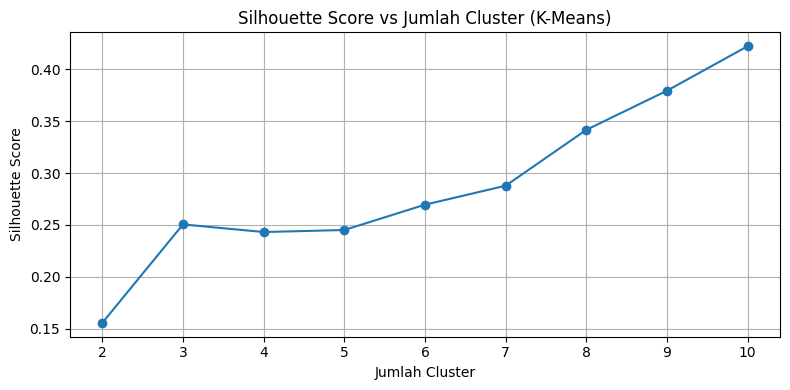

In [194]:
# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Jumlah Cluster (K-Means)")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan plot silhouette score di atas, diperoleh bahwa jumlah klasternya adalah 10.

In [195]:
# Pilih jumlah cluster terbaik berdasarkan silhouette tertinggi
best_k_kmeans = range_n_clusters[np.argmax(silhouette_scores)]
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_processed)

In [196]:
# PCA untuk visualisasi 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

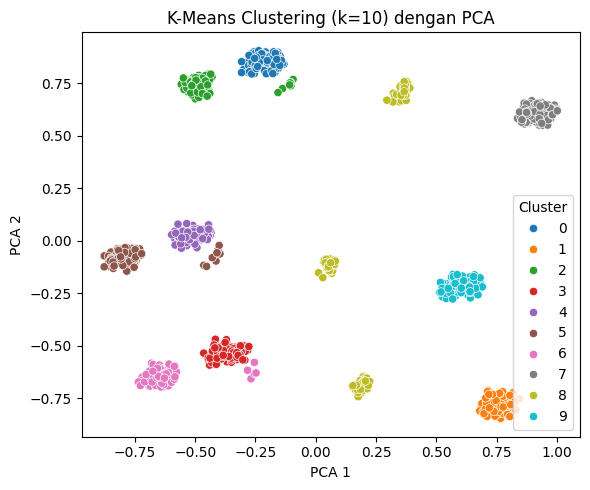

In [197]:
# Visualisasi hasil clustering
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='tab10')
plt.title(f"K-Means Clustering (k={best_k}) dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [219]:
# Fit KMeans
kmeans = KMeans(n_clusters=10, random_state=26)
kmeans_labels = kmeans.fit_predict(X_processed)

# Gunakan label KMeans sebagai referensi
reference_labels = kmeans_labels

# Evaluasi
metrics_kmeans = evaluate_clustering(X_processed, kmeans_labels)

# Print hasil evaluasi
print("\nEvaluation Metrics - KMeans:")
for metric, value in metrics_kmeans.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics - KMeans:
Silhouette Score: 0.4222
Davies-Bouldin Index: 1.0416
Calinski-Harabasz Index: 258.8935
Dunn Index: 0.5853


#### DBSCAN

In [199]:
# Tuning parameter DBSCAN
best_score = -1
best_params = {'eps': None, 'min_samples': None}
best_labels = None

In [200]:
print("Tuning DBSCAN parameters:")
for eps in [i / 10 for i in range(5, 16)]:  # 0.5 to 1.5
    for min_samples in range(9, 15):       # 9 to 14
        print(f'\neps: {eps}, min_samples: {min_samples}')
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_processed)

        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f'Number of clusters: {n_clusters}')
        print(f'Number of noise points: {n_noise}')

        if n_clusters > 1:
            score = silhouette_score(X_processed[labels != -1], labels[labels != -1])
            print(f'Silhouette Score: {score:.4f}')
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels
        else:
            print("Not enough clusters formed.")


Tuning DBSCAN parameters:

eps: 0.5, min_samples: 9
Number of clusters: 23
Number of noise points: 123
Silhouette Score: 0.3965

eps: 0.5, min_samples: 10
Number of clusters: 20
Number of noise points: 162
Silhouette Score: 0.4190

eps: 0.5, min_samples: 11
Number of clusters: 22
Number of noise points: 205
Silhouette Score: 0.4079

eps: 0.5, min_samples: 12
Number of clusters: 19
Number of noise points: 247
Silhouette Score: 0.4497

eps: 0.5, min_samples: 13
Number of clusters: 19
Number of noise points: 294
Silhouette Score: 0.4437

eps: 0.5, min_samples: 14
Number of clusters: 15
Number of noise points: 352
Silhouette Score: 0.5007

eps: 0.6, min_samples: 9
Number of clusters: 12
Number of noise points: 49
Silhouette Score: 0.4674

eps: 0.6, min_samples: 10
Number of clusters: 13
Number of noise points: 50
Silhouette Score: 0.4520

eps: 0.6, min_samples: 11
Number of clusters: 13
Number of noise points: 53
Silhouette Score: 0.4536

eps: 0.6, min_samples: 12
Number of clusters: 13
Nu

In [201]:
# Jika tidak ada kombinasi yang valid, gunakan default
if best_params['eps'] is None:
    print("\nNo valid parameters found. Using default eps=0.9, min_samples=3")
    best_params = {'eps': 0.9, 'min_samples': 3}
    dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    best_labels = dbscan.fit_predict(X_processed)

In [202]:
# Tampilkan parameter terbaik
print(f"\nBest Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
n_clusters_ = len(set(best_labels)) - (1 if -1 in best_labels else 0)
n_noise_ = list(best_labels).count(-1)
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


Best Parameters: eps=0.5, min_samples=14
Estimated number of clusters: 15
Estimated number of noise points: 352


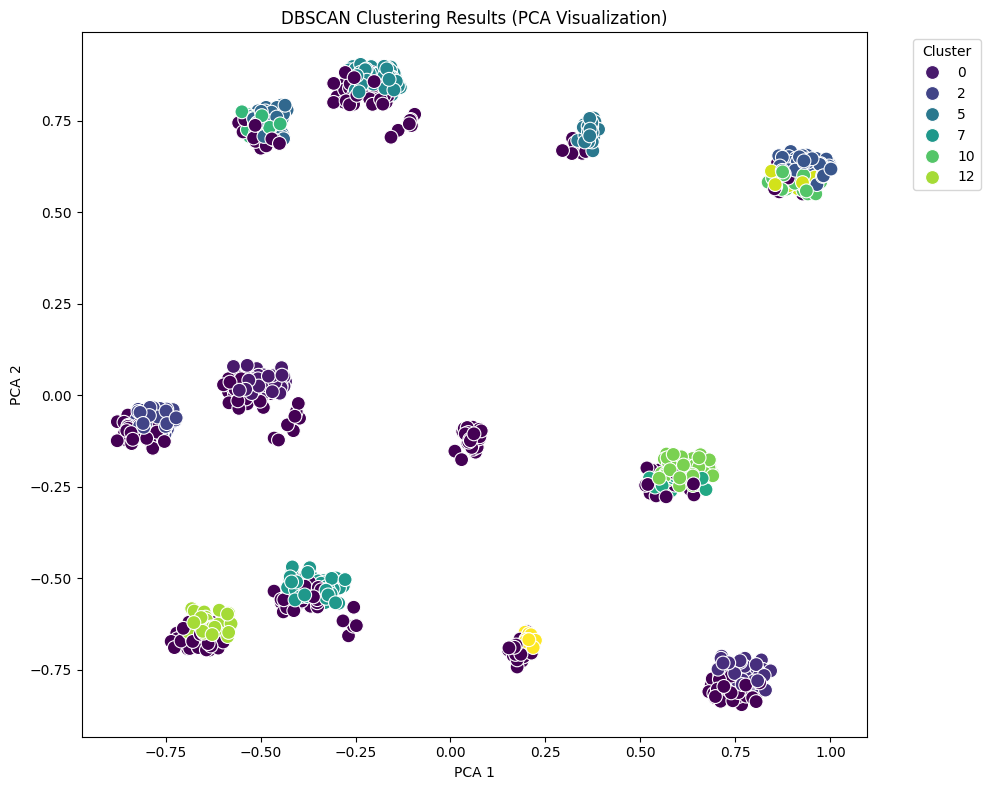

In [203]:
# Visualisasi PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X_processed), columns=['PC_1', 'PC_2'])
df_pca['klaster'] = best_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC_1', y='PC_2', hue='klaster', palette='viridis', s=100)
plt.title(f'DBSCAN Clustering Results (PCA Visualization)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [220]:
# Evaluasi DBSCAN terbaik
metrics_dbscan = evaluate_clustering(X_processed, best_labels)

# Cetak hasil evaluasi
print("\nEvaluation Metrics - DBSCAN:")
for metric, value in metrics_dbscan.items():
    print(f"{metric}: {value:.4f}" if not np.isnan(value) else f"{metric}: Not Applicable")



Evaluation Metrics - DBSCAN:
Silhouette Score: 0.1864
Davies-Bouldin Index: 1.2634
Calinski-Harabasz Index: 88.3475
Dunn Index: 0.0342


#### Agglomerative Clustering

In [205]:
# Uji beberapa jumlah cluster
range_n_clusters = range(2, 11)
silhouette_scores_agglo = []

for n_clusters in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', metric='euclidean')
    labels = model.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores_agglo.append(score)

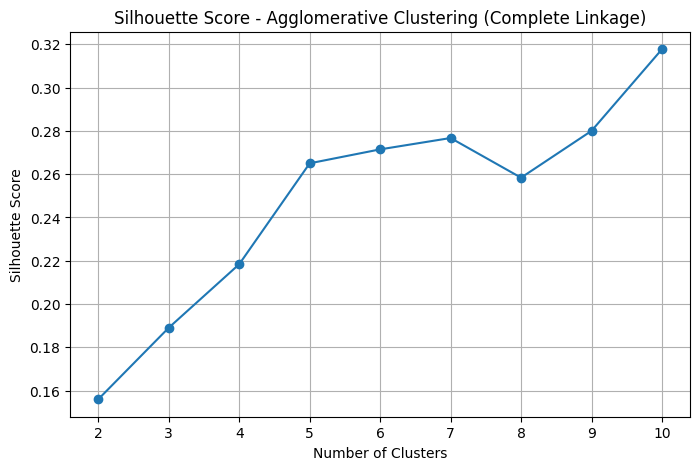

In [206]:
# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores_agglo, marker='o')
plt.title("Silhouette Score - Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Berdasarkan plot silhoutte score di atas, diperoleh informasi bahwa jumlah klaster adalah 10 klaster.

In [207]:
# Pilih model terbaik
best_k = range_n_clusters[np.argmax(silhouette_scores_agglo)]
model = AgglomerativeClustering(n_clusters=best_k, linkage='complete', metric='euclidean')
labels = model.fit_predict(X_processed)

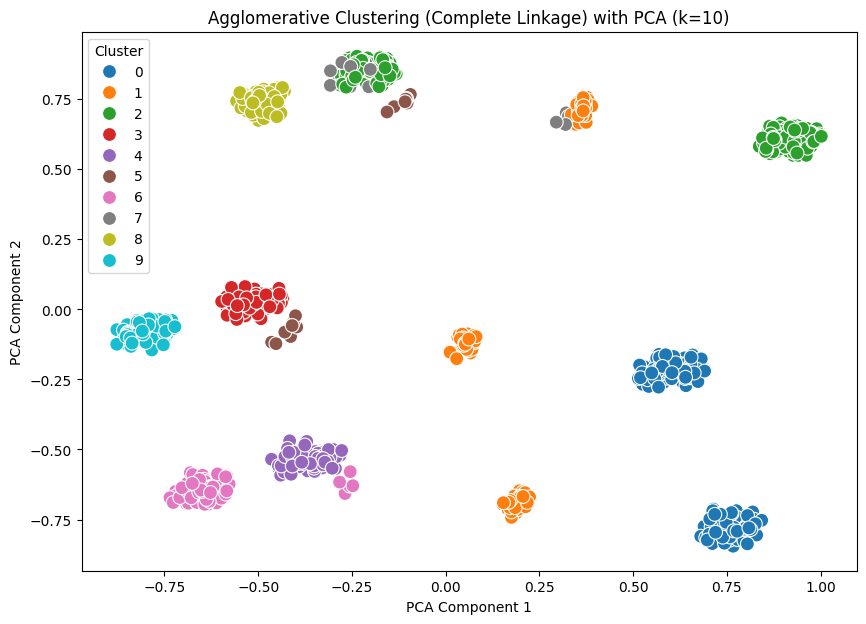

In [208]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=100)
plt.title(f"Agglomerative Clustering (Complete Linkage) with PCA (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

In [221]:
# Evaluasi metrik
metrics_agglo = evaluate_clustering(X_processed, labels)

print(f"\nEvaluation Metrics (Agglomerative Clustering, k={best_k}):")
for metric, value in metrics_agglo.items():
    print(f"{metric}: {value:.4f}" if not np.isnan(value) else f"{metric}: Not Applicable")


Evaluation Metrics (Agglomerative Clustering, k=10):
Silhouette Score: 0.4222
Davies-Bouldin Index: 1.0416
Calinski-Harabasz Index: 258.8935
Dunn Index: 0.5853


#### Gaussian Mixture Model

In [210]:
# Silhouette Score untuk memilih jumlah klaster terbaik
range_n_components = range(2, 11)
silhouette_scores_gmm = []

for n in range_n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores_gmm.append(score)

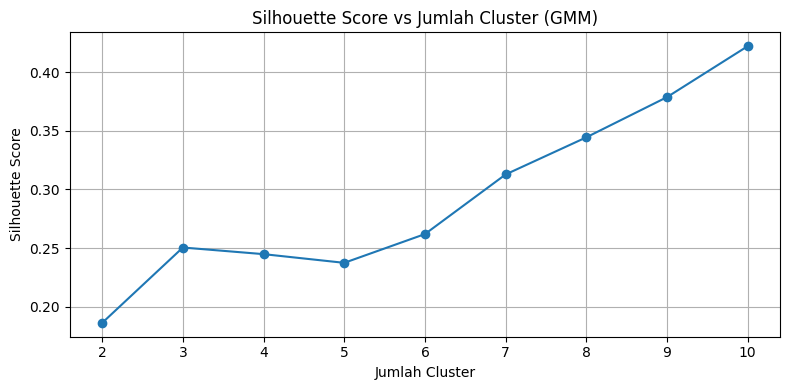

In [211]:
# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range_n_components, silhouette_scores_gmm, marker='o')
plt.title("Silhouette Score vs Jumlah Cluster (GMM)")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [212]:
# Pilih jumlah klaster terbaik
best_k = range_n_components[np.argmax(silhouette_scores_gmm)]
gmm_best = GaussianMixture(n_components=best_k, random_state=42)
gmm_best.fit(X_processed)
gmm_labels = gmm_best.predict(X_processed)

In [213]:
# Dapatkan probabilitas setiap titik data
gmm_probs = gmm_best.predict_proba(X_processed)

In [214]:
# Simpan probabilitas ke dataframe
df_gmm = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)
df_gmm['klaster'] = gmm_labels
for i in range(gmm_probs.shape[1]):
    df_gmm[f'cluster_{i}_probability'] = gmm_probs[:, i]

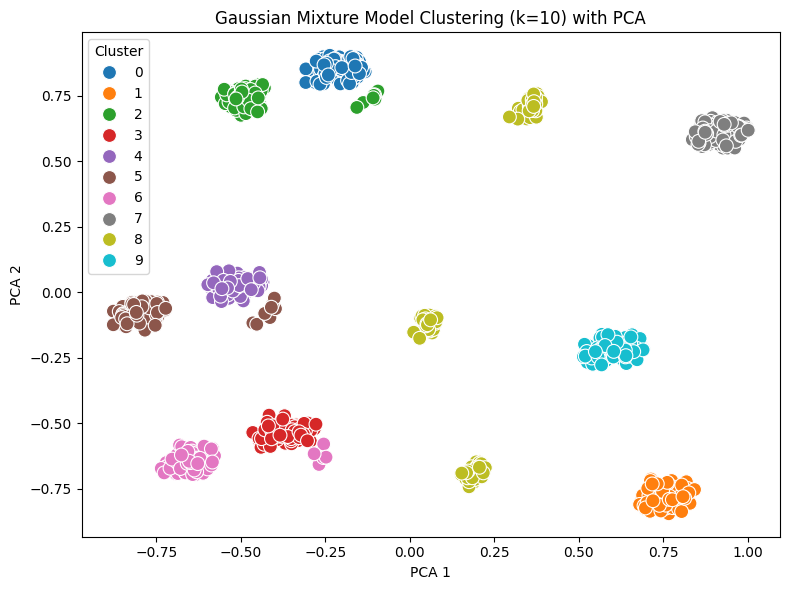

In [215]:
# Visualisasi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
df_gmm_pca = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])
df_gmm_pca['klaster'] = gmm_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_gmm_pca, x='PCA 1', y='PCA 2', hue='klaster', palette='tab10', s=100)
plt.title(f'Gaussian Mixture Model Clustering (k={best_k}) with PCA')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [222]:
# Evaluasi
metrics_gmm = evaluate_clustering(X_processed, gmm_labels)

# Print hasil evaluasi
print("\nEvaluation Metrics - GMM:")
for metric, value in metrics_gmm.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics - GMM:
Silhouette Score: 0.4222
Davies-Bouldin Index: 1.0416
Calinski-Harabasz Index: 258.8935
Dunn Index: 0.5853


### Skema 2

In [236]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
numeric_features = ['age', 'quantity', 'total_amount', 'month', 'total_per_unit']
categorical_features = ['product_category', 'age_group']

In [252]:
pca_full = PCA()
pca_full.fit(X_num_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_model = np.argmax(cum_var >= 0.95) + 1
print(f"Jumlah komponen untuk 95% varians: {n_components_model}")

Jumlah komponen untuk 95% varians: 4


In [253]:
# Fit PCA dengan komponen optimal
pca_model = PCA(n_components=n_components_model)
X_num_pca_reduced = pca_model.fit_transform(X_num_scaled)

In [254]:
encoder = OneHotEncoder(sparse_output=False)
X_cat_encoded = encoder.fit_transform(data[categorical_features])

In [242]:
# Gabungkan
X_combined = np.hstack([X_num_pca_reduced, X_cat_encoded])

In [243]:
# --- 4A. KMeans ---
range_n_clusters = range(2, 11)
silhouette_kmeans = []
for k in range_n_clusters:
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_combined)
    silhouette_kmeans.append(silhouette_score(X_combined, labels))

best_k_kmeans_pca = range_n_clusters[np.argmax(silhouette_kmeans)]
labels_kmeans_pca = KMeans(n_clusters=best_k_kmeans_pca, random_state=42, n_init=10).fit_predict(X_combined)
metrics_kmeans_pca = evaluate_clustering(X_combined, labels_kmeans)

# --- 4B. DBSCAN ---
best_eps, best_min = None, None
best_score = -1
for eps in [0.4, 0.5, 0.6, 0.7]:
    for min_samples in [5, 6, 7, 8]:
        labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_combined)
        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X_combined[labels != -1], labels[labels != -1])
            if score > best_score:
                best_score = score
                best_eps, best_min = eps, min_samples

labels_dbscan_pca = DBSCAN(eps=best_eps, min_samples=best_min).fit_predict(X_combined)
metrics_dbscan_pca = evaluate_clustering(X_combined, labels_dbscan_pca)

# --- 4C. Agglomerative ---
silhouette_agglo = []
for k in range_n_clusters:
    labels = AgglomerativeClustering(n_clusters=k, linkage='complete', metric='euclidean').fit_predict(X_combined)
    silhouette_agglo.append(silhouette_score(X_combined, labels))

best_k_agglo_pca = range_n_clusters[np.argmax(silhouette_agglo)]
labels_agglo_pca = AgglomerativeClustering(n_clusters=best_k_agglo_pca, linkage='complete', metric='euclidean').fit_predict(X_combined)
metrics_agglo_pca = evaluate_clustering(X_combined, labels_agglo_pca)

# --- 4D. GMM ---
silhouette_gmm = []
for k in range_n_clusters:
    labels = GaussianMixture(n_components=k, random_state=42).fit_predict(X_combined)
    silhouette_gmm.append(silhouette_score(X_combined, labels))

best_k_gmm_pca = range_n_clusters[np.argmax(silhouette_gmm)]
labels_gmm_pca = GaussianMixture(n_components=best_k_gmm_pca, random_state=42).fit_predict(X_combined)
metrics_gmm_pca = evaluate_clustering(X_combined, labels_gmm_pca)

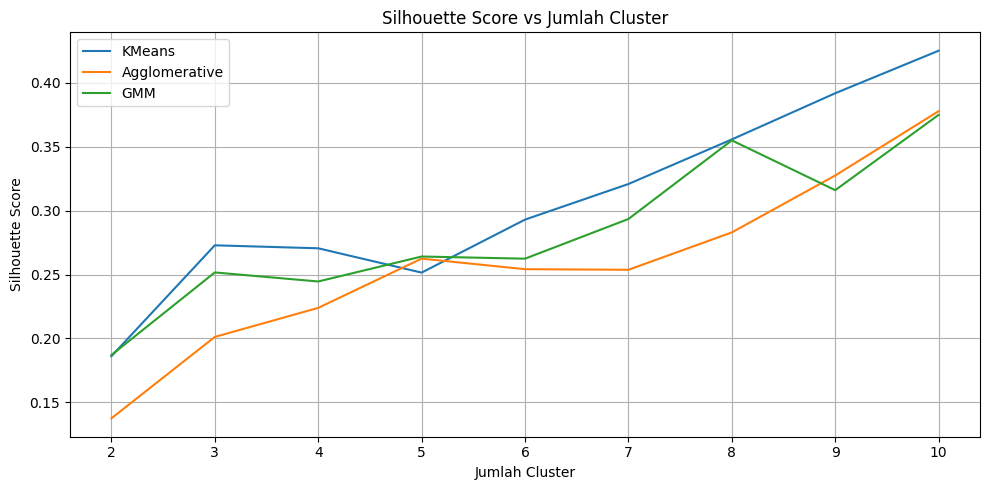

In [244]:
# --- 5. Plot Silhouette Score ---
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_kmeans, label='KMeans')
plt.plot(range_n_clusters, silhouette_agglo, label='Agglomerative')
plt.plot(range_n_clusters, silhouette_gmm, label='GMM')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

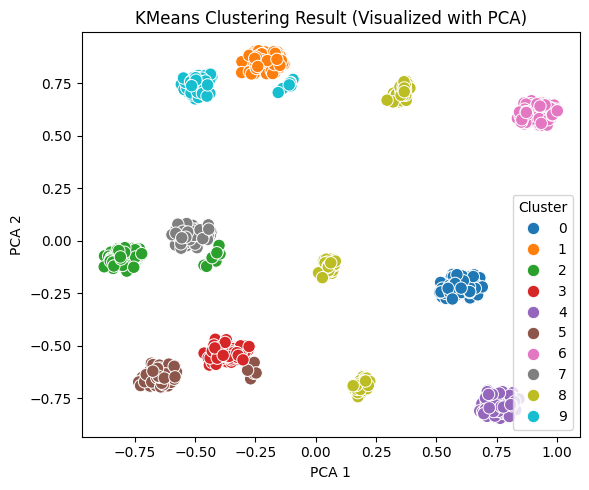

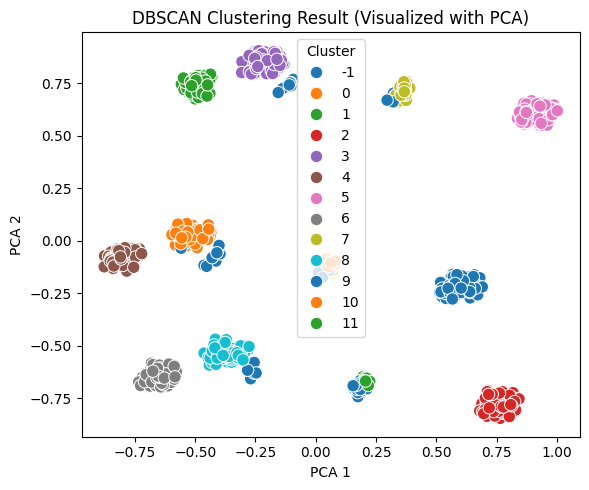

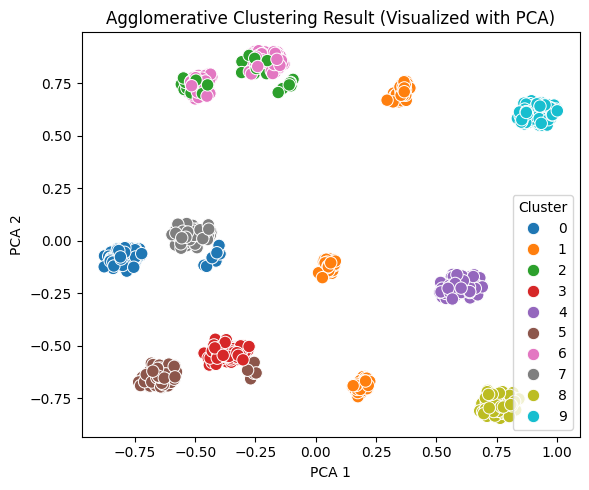

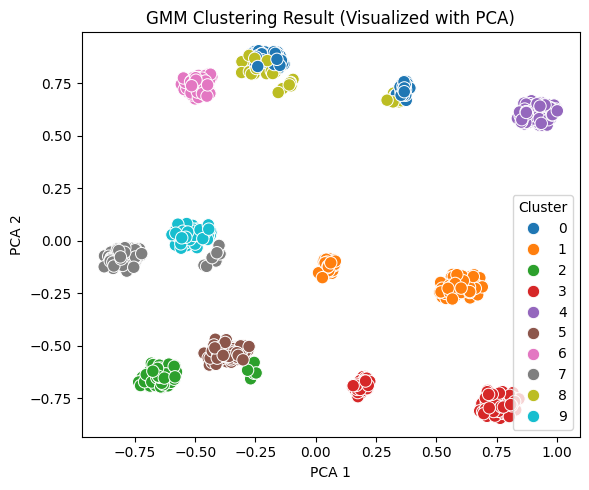

In [245]:
# --- 6. PCA 2D untuk visualisasi ---
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_combined)

# Visualisasi hasil clustering
methods = {
    'KMeans': labels_kmeans_pca,
    'DBSCAN': labels_dbscan_pca,
    'Agglomerative': labels_agglo_pca,
    'GMM': labels_gmm_pca
}

for name, labels in methods.items():
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels, palette='tab10', s=80)
    plt.title(f"{name} Clustering Result (Visualized with PCA)")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()


In [246]:
# 7. Print Evaluation Metrics ---
print("\nEvaluation Metrics Summary:")
all_metrics = {
    'KMeans': metrics_kmeans_pca,
    'DBSCAN': metrics_dbscan_pca,
    'Agglomerative': metrics_agglo_pca,
    'GMM': metrics_gmm_pca
}

for name, metrics in all_metrics.items():
    print(f"\n{name}")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}" if not np.isnan(v) else f"{k}: Not Applicable")


Evaluation Metrics Summary:

KMeans
Silhouette Score: 0.4252
Davies-Bouldin Index: 1.0357
Calinski-Harabasz Index: 262.4012
Dunn Index: 0.5855

DBSCAN
Silhouette Score: 0.4378
Davies-Bouldin Index: 1.3439
Calinski-Harabasz Index: 222.5980
Dunn Index: 0.0327

Agglomerative
Silhouette Score: 0.3779
Davies-Bouldin Index: 1.2625
Calinski-Harabasz Index: 225.3752
Dunn Index: 0.1506

GMM
Silhouette Score: 0.3750
Davies-Bouldin Index: 1.2957
Calinski-Harabasz Index: 224.2637
Dunn Index: 0.2099


## Evaluation

Pada tahapan ini, Anda diwajibkan untuk melakukan evaluasi dari hasil clustering (4 x 2 skema) yang telah anda lakukan. Evaluasi dilakukan dengan ketentuan sebagai berikut.
- Anda dapat memilih minimal 4 metrik evaluasi clustering. 
- Anda diperbolehkan menggunakan fungsi untuk menampilkan evaluasi dari seluruh skema yang digunakan secara langsung.

<span style="color: red;">
Perhatian:

Jika algoritma clustering yang Anda gunakan tidak memiliki fungsi untuk menghitung suatu metrik, Anda diperbolehkan untuk membangun fungsi berdasarkan rumus perhitungan metrik tersebut.
</span>

In [247]:
import pandas as pd

# Gabungkan semua ke dalam satu dictionary besar
all_metrics = {
    'KMeans': metrics_kmeans,
    'DBSCAN': metrics_dbscan,
    'Agglomerative': metrics_agglo,
    'GMM': metrics_gmm,
    'KMeans_PCA': metrics_kmeans_pca,
    'DBSCAN_PCA': metrics_dbscan_pca,
    'Agglomerative_PCA': metrics_agglo_pca,
    'GMM_PCA': metrics_gmm_pca,
}

# Konversi ke DataFrame
df_metrics = pd.DataFrame(all_metrics).T

# Tampilkan tabel metrik
print("\nTabel Metrik Evaluasi Clustering:")
display(df_metrics.round(4))



Tabel Metrik Evaluasi Clustering:


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Dunn Index
KMeans,0.4222,1.0416,258.8935,0.5853
DBSCAN,0.1864,1.2634,88.3475,0.0342
Agglomerative,0.4222,1.0416,258.8935,0.5853
GMM,0.4222,1.0416,258.8935,0.5853
KMeans_PCA,0.4252,1.0357,262.4012,0.5855
DBSCAN_PCA,0.4378,1.3439,222.5980,0.0327
Agglomerative_PCA,0.3779,1.2625,225.3752,0.1506
GMM_PCA,0.3750,1.2957,224.2637,0.2099


In [248]:
# Buat salinan untuk ranking
df_ranked = df_metrics.copy()

# Ranking: semakin tinggi = semakin baik (benefit)
df_ranked['Silhouette Score (Rank)'] = df_ranked['Silhouette Score'].rank(ascending=False)
df_ranked['Calinski-Harabasz Index (Rank)'] = df_ranked['Calinski-Harabasz Index'].rank(ascending=False)
df_ranked['Dunn Index (Rank)'] = df_ranked['Dunn Index'].rank(ascending=False)

# Ranking: semakin rendah = semakin baik (cost)
df_ranked['Davies-Bouldin Index (Rank)'] = df_ranked['Davies-Bouldin Index'].rank(ascending=True)

# Hitung total rank
df_ranked['Total Rank'] = df_ranked.filter(like='(Rank)').sum(axis=1)

# Urutkan berdasarkan total ranking terendah
df_best = df_ranked.sort_values('Total Rank')

# Tampilkan tabel lengkap ranking
print("\n📊 Ranking Model Berdasarkan 4 Metrik:")
display(df_best[[
    'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index', 'Total Rank'
]].round(4))

# Tampilkan model terbaik
best_model = df_best.index[0]
print(f"\n🏆 Model clustering terbaik secara keseluruhan adalah: **{best_model}**")



📊 Ranking Model Berdasarkan 4 Metrik:


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Dunn Index,Total Rank
KMeans_PCA,0.4252,1.0357,262.4012,0.5855,5.0
Agglomerative,0.4222,1.0416,258.8935,0.5853,12.0
GMM,0.4222,1.0416,258.8935,0.5853,12.0
KMeans,0.4222,1.0416,258.8935,0.5853,15.0
Agglomerative_PCA,0.3779,1.2625,225.3752,0.1506,22.0
DBSCAN_PCA,0.4378,1.3439,222.5980,0.0327,24.0
GMM_PCA,0.3750,1.2957,224.2637,0.2099,25.0
DBSCAN,0.1864,1.2634,88.3475,0.0342,29.0



🏆 Model clustering terbaik secara keseluruhan adalah: **KMeans_PCA**


## Profiling

Pada tahapan ini, Anda dapat melanjutkan analisis Anda dengan menjalankan skema terbaik yang Anda peroleh berdasarkan hasil sebelumnya. Selanjutnya, Anda diwajibkan untuk melakukan profiling dari hasil clustering yang Anda peroleh. Profiling dapat dilakukan dengan ketentuan sebagai berikut.
- Jika Anda model terbaik anda menggunakan dimensionality reduction, Anda wajib melakukan inverse transform ke variabel awal.
- Lakukan visualisasi untuk setiap variabel numerik dan kategorik yang Anda gunakan. Visualisasi dibedakan atau dikelompokkan berdasarkan cluster (disarankan dalam canvas plot yang sama).
- Lakukan statistik deskriptif untuk setiap variabel berdasarkan cluster.
- Interpretasikan dan lakukan profiling setiap cluster berdasarkan visualisasi dan statistik deskriptif yang diperoleh.

In [255]:
# Inverse transform dengan PCA yang konsisten
X_num_reconstructed = pca_model.inverse_transform(X_num_pca_reduced)

# Kembalikan ke DataFrame dengan kolom asli
df_num_original = pd.DataFrame(X_num_reconstructed, columns=numeric_features)

# Gabungkan dengan fitur kategorik dan label klaster
df_profiled = pd.concat([df_num_original, data[categorical_features].reset_index(drop=True)], axis=1)
df_profiled['cluster'] = labels_kmeans_pca


In [256]:
# Statistik numerik
num_stats = df_profiled.groupby('cluster')[numeric_features].agg(['mean', 'min', 'max'])

# Statistik kategorikal (modus)
cat_stats = df_profiled.groupby('cluster')[categorical_features].agg(lambda x: x.mode().iloc[0])

# Gabungkan hasil
print("Statistik Deskriptif Numerik:")
display(num_stats.round(2))
print("\nStatistik Deskriptif Kategorikal:")
display(cat_stats)


Statistik Deskriptif Numerik:


age             quantity             total_amount             month  \
         mean   min   max     mean   min   max         mean   min   max  mean   
cluster                                                                         
0        0.75  0.61  0.91     0.51 -0.05  1.04         0.22 -0.09  0.85  0.51   
1        0.44  0.28  0.59     0.54 -0.05  1.04         0.20 -0.09  0.86  0.50   
2        0.13 -0.00  0.26     0.51 -0.05  1.04         0.23 -0.09  0.86  0.49   
3        0.44  0.28  0.59     0.49 -0.05  1.04         0.21 -0.09  0.86  0.55   
4        0.76  0.61  0.91     0.51 -0.05  1.04         0.22 -0.09  0.86  0.53   
5        0.12 -0.00  0.26     0.48 -0.05  1.04         0.22 -0.08  0.86  0.54   
6        0.76  0.61  0.91     0.49 -0.05  1.04         0.21 -0.10  0.85  0.44   
7        0.44  0.28  0.59     0.53 -0.05  1.04         0.26 -0.09  0.86  0.50   
8        0.97  0.93  1.00     0.48 -0.05  1.04         0.16 -0.10  0.85  0.53   
9        0.13 -0.00  0.26     0.52 -0.05  1.04         0.26 -0.09  0.86  0.45   

                  total_per_unit              
         min  max           mean   min   max  
cluster                                       
0       -0.0  1.0           0.34 -0.05  1.09  
1       -0.0  1.0           0.28 -0.05  1.09  
2       -0.0  1.0           0.34 -0.05  1.09  
3       -0.0  1.0           0.32 -0.05  1.09  
4       -0.0  1.0           0.34 -0.05  1.10  
5       -0.0  1.0           0.32 -0.05  1.09  
6       -0.0  1.0           0.33 -0.05  1.09  
7       -0.0  1.0           0.37 -0.05  1.09  
8       -0.0  1.0           0.26 -0.05  1.10  
9       -0.0  1.0           0.37 -0.05  1.09


Statistik Deskriptif Kategorikal:


,product_category,age_group
cluster,,
0,Beauty,Paruh Baya
1,Clothing,Dewasa
2,Beauty,Dewasa Muda
3,Electronics,Dewasa
4,Electronics,Paruh Baya
5,Electronics,Dewasa Muda
6,Clothing,Paruh Baya
7,Beauty,Dewasa
8,Electronics,Lansia


C:\Users\Asus\AppData\Local\Temp\ipykernel_10436\3431768384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_profiled, palette='Set2')


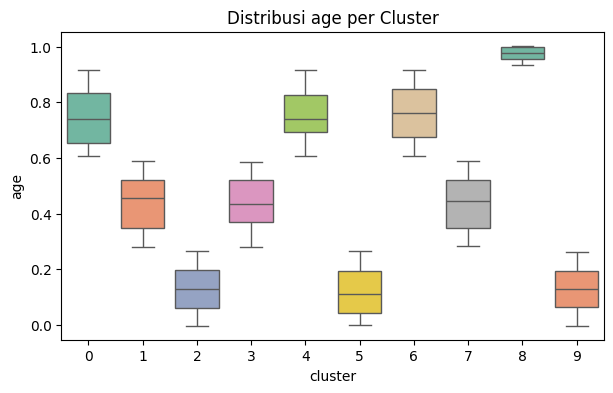

C:\Users\Asus\AppData\Local\Temp\ipykernel_10436\3431768384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_profiled, palette='Set2')


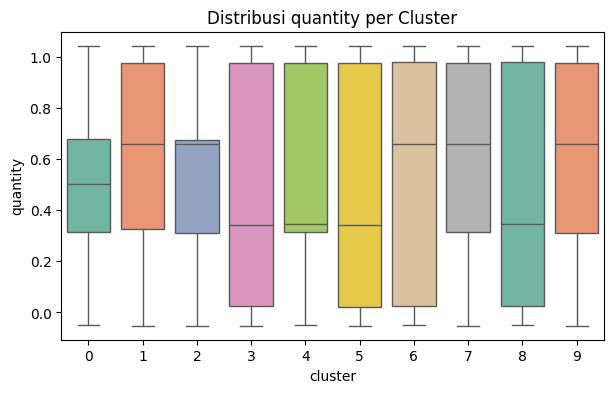

C:\Users\Asus\AppData\Local\Temp\ipykernel_10436\3431768384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_profiled, palette='Set2')


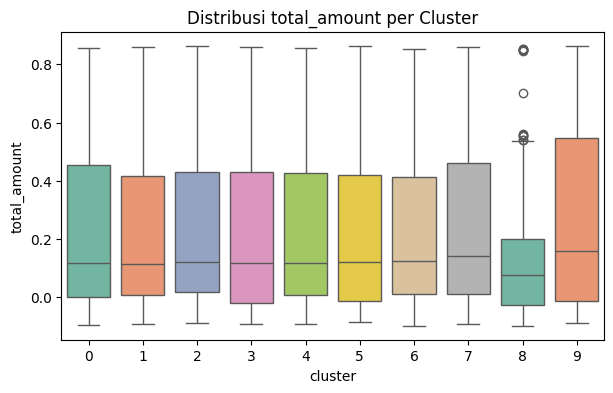

C:\Users\Asus\AppData\Local\Temp\ipykernel_10436\3431768384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_profiled, palette='Set2')


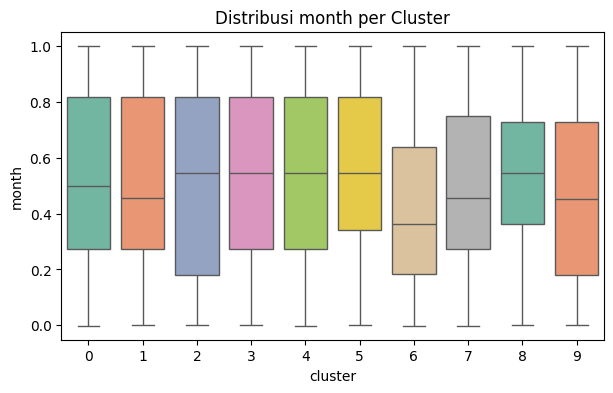

C:\Users\Asus\AppData\Local\Temp\ipykernel_10436\3431768384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_profiled, palette='Set2')


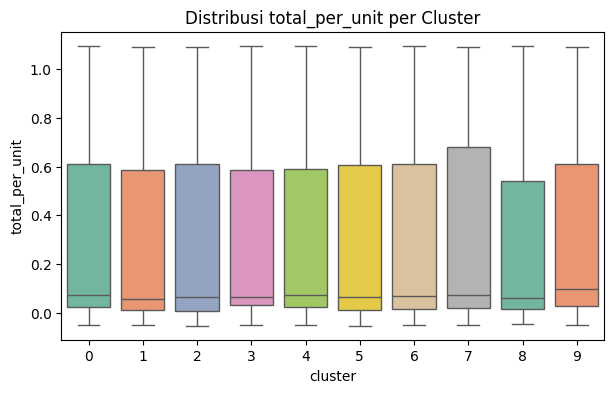

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi variabel numerik
for col in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='cluster', y=col, data=df_profiled, palette='Set2')
    plt.title(f'Distribusi {col} per Cluster')
    plt.show()


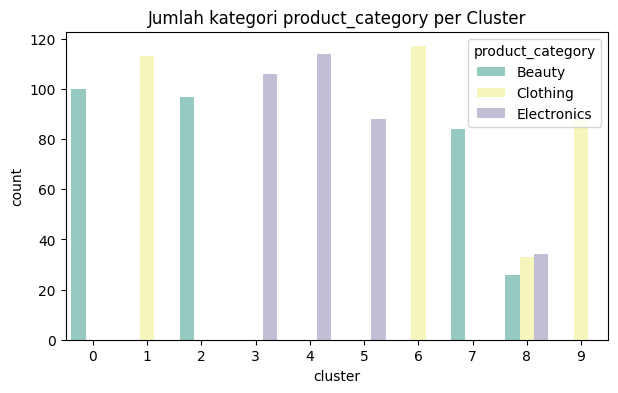

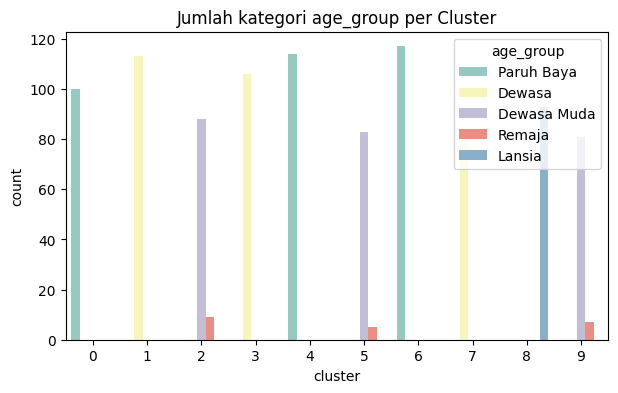

In [259]:
for col in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(x='cluster', hue=col, data=df_profiled, palette='Set3')
    plt.title(f'Jumlah kategori {col} per Cluster')
    plt.legend(title=col)
    plt.show()

In [260]:
for cluster_id in sorted(df_profiled['cluster'].unique()):
    print(f"\n🔹 Cluster {cluster_id} Profile:")
    for col in numeric_features:
        mean_val = num_stats.loc[cluster_id, (col, 'mean')]
        min_val = num_stats.loc[cluster_id, (col, 'min')]
        max_val = num_stats.loc[cluster_id, (col, 'max')]
        print(f"- {col}: mean = {mean_val:.2f}, min = {min_val:.2f}, max = {max_val:.2f}")

    for col in categorical_features:
        mode_val = cat_stats.loc[cluster_id, col]
        print(f"- {col}: most frequent = {mode_val}")



🔹 Cluster 0 Profile:
- age: mean = 0.75, min = 0.61, max = 0.91
- quantity: mean = 0.51, min = -0.05, max = 1.04
- total_amount: mean = 0.22, min = -0.09, max = 0.85
- month: mean = 0.51, min = -0.00, max = 1.00
- total_per_unit: mean = 0.34, min = -0.05, max = 1.09
- product_category: most frequent = Beauty
- age_group: most frequent = Paruh Baya

🔹 Cluster 1 Profile:
- age: mean = 0.44, min = 0.28, max = 0.59
- quantity: mean = 0.54, min = -0.05, max = 1.04
- total_amount: mean = 0.20, min = -0.09, max = 0.86
- month: mean = 0.50, min = -0.00, max = 1.00
- total_per_unit: mean = 0.28, min = -0.05, max = 1.09
- product_category: most frequent = Clothing
- age_group: most frequent = Dewasa

🔹 Cluster 2 Profile:
- age: mean = 0.13, min = -0.00, max = 0.26
- quantity: mean = 0.51, min = -0.05, max = 1.04
- total_amount: mean = 0.23, min = -0.09, max = 0.86
- month: mean = 0.49, min = -0.00, max = 1.00
- total_per_unit: mean = 0.34, min = -0.05, max = 1.09
- product_category: most freque

# Kesimpulan dan Rekomendasi

Berdasarkan hasil clustering menggunakan metode K-Means dengan PCA, diperoleh 10 klaster yang masing-masing memiliki karakteristik unik sebagai berikut:

### 🔹 Klaster 0
- **Profil Numerik:** Usia pelanggan relatif tinggi (mean usia sekitar 75% dari rentang skala), volume pembelian sedang, nilai transaksi total rendah hingga sedang.
- **Preferensi Produk:** Dominan membeli produk kategori *Beauty*.
- **Kelompok Usia:** Mayoritas pelanggan berusia paruh baya.
- **Interpretasi:** Kelompok pelanggan ini kemungkinan adalah konsumen paruh baya yang fokus pada produk kecantikan dengan pembelian volume sedang, cocok untuk kampanye produk perawatan kulit dan promosi eksklusif.

### 🔹 Klaster 1
- **Profil Numerik:** Usia dewasa (mean 44%), volume pembelian sedang, total pengeluaran rendah hingga sedang.
- **Preferensi Produk:** Produk kategori *Clothing* paling sering dibeli.
- **Kelompok Usia:** Dewasa muda hingga dewasa.
- **Interpretasi:** Segmen ini lebih tertarik pada produk pakaian dan bisa ditargetkan dengan kampanye fashion terkini dan penawaran musiman.

### 🔹 Klaster 2
- **Profil Numerik:** Usia muda (sekitar 13%), pembelian volume sedang, pengeluaran transaksi rendah hingga sedang.
- **Preferensi Produk:** Dominan produk *Beauty*.
- **Kelompok Usia:** Dewasa muda.
- **Interpretasi:** Pelanggan muda yang aktif membeli produk kecantikan; program loyalitas dan diskon untuk produk *trendy* dapat meningkatkan retensi mereka.

### 🔹 Klaster 3
- **Profil Numerik:** Usia dewasa (44%), pembelian volume sedang, pengeluaran menengah.
- **Preferensi Produk:** Mayoritas membeli produk *Electronics*.
- **Kelompok Usia:** Dewasa.
- **Interpretasi:** Konsumen dewasa dengan minat pada produk elektronik. Perusahaan berpotensi untuk kampanye teknologi dan gadget terbaru.

### 🔹 Klaster 4
- **Profil Numerik:** Usia paruh baya (76%), volume pembelian sedang, pengeluaran total sedang.
- **Preferensi Produk:** Produk *Electronics* dominan.
- **Kelompok Usia:** Paruh baya.
- **Interpretasi:** Segmen pelanggan usia paruh baya yang gemar produk elektronik, cocok untuk promosi produk teknologi dengan fitur kemudahan penggunaan.

### 🔹 Klaster 5
- **Profil Numerik:** Usia muda (12%), pembelian volume sedang, pengeluaran menengah.
- **Preferensi Produk:** Elektronik.
- **Kelompok Usia:** Dewasa muda.
- **Interpretasi:** Pelanggan muda dengan ketertarikan pada produk teknologi. Hal ini dapat ditargetkan dengan inovasi dan promo produk elektronik terbaru.

### 🔹 Klaster 6
- **Profil Numerik:** Usia paruh baya (76%), volume pembelian sedang, pengeluaran sedang.
- **Preferensi Produk:** Produk *Clothing*.
- **Kelompok Usia:** Paruh baya.
- **Interpretasi:** Konsumen paruh baya yang aktif membeli pakaian. Dengan demikian, dapat dilakukan strategi pemasaran yang menonjolkan kenyamanan dan kualitas bisa efektif.

### 🔹 Klaster 7
- **Profil Numerik:** Usia dewasa (44%), pembelian volume sedang, pengeluaran tinggi.
- **Preferensi Produk:** Produk *Beauty*.
- **Kelompok Usia:** Dewasa.
- **Interpretasi:** Pelanggan dewasa yang peduli pada produk kecantikan dengan daya beli cukup tinggi sehingga dapat diarahkan pada produk premium.

### 🔹 Klaster 8
- **Profil Numerik:** Usia lanjut (97%), pembelian volume rendah, pengeluaran rendah.
- **Preferensi Produk:** Elektronik.
- **Kelompok Usia:** Lansia.
- **Interpretasi:** Segmen lansia yang lebih hemat namun tetap membutuhkan produk elektronik tertentu; perlu pendekatan khusus untuk kemudahan penggunaan.

### 🔹 Klaster 9
- **Profil Numerik:** Usia muda (13%), pembelian volume sedang, pengeluaran tinggi.
- **Preferensi Produk:** Produk *Clothing*.
- **Kelompok Usia:** Dewasa muda.
- **Interpretasi:** Pelanggan muda dengan daya beli tinggi dan minat pada pakaian; cocok untuk penawaran fashion premium dan trendi.

---

Setiap klaster menunjukkan karakteristik unik yang dapat digunakan perusahaan retail untuk mengembangkan strategi pemasaran yang lebih tepat sasaran. Pemahaman ini memungkinkan penyesuaian produk, promosi, dan komunikasi yang sesuai dengan preferensi dan kemampuan beli tiap segmen pelanggan.

Rekomendasi yang dapat diberikan berdasarkan segmentasi ini adalah untuk mengembangkan strategi pemasaran yang disesuaikan dengan karakteristik setiap klaster. Misalnya, klaster yang mayoritas berusia paruh baya dan sering membeli produk kategori Beauty dapat difokuskan pada promosi produk perawatan kulit dan kecantikan dengan penawaran eksklusif. Sementara itu, klaster yang didominasi oleh kelompok usia dewasa muda dan menyukai elektronik dapat diarahkan pada kampanye digital yang menonjolkan inovasi teknologi terbaru. Selain itu, perusahaan dapat mengalokasikan sumber daya secara efisien dengan mengoptimalkan anggaran pemasaran pada klaster yang memiliki potensi pembelian terbesar berdasarkan nilai transaksi rata-rata.

Secara keseluruhan, segmentasi pelanggan ini dapat menjadi dasar yang kuat untuk personalisasi penawaran, meningkatkan efektivitas pemasaran, meningkatkan loyalitas pelanggan, serta mengidentifikasi peluang produk baru yang relevan dengan kebutuhan tiap segmen. Implementasi strategi berbasis data ini diharapkan dapat meningkatkan efektivitas pemasaran dan memperkuat posisi kompetitif perusahaan di pasar retail.

# Daftar Pustaka

- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.
- Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. *KDD*, 96(34), 226–231.
- Jain, A. K. (2010). Data clustering: 50 years beyond K-means. *Pattern Recognition Letters*, 31(8), 651–666.
- Jolliffe, I. T. (2002). *Principal Component Analysis* (2nd ed.). Springer.
- Mullner, D. (2011). Modern hierarchical, agglomerative clustering algorithms. *arXiv preprint arXiv:1109.2378*.
- Reynolds, D. A. (2009). Gaussian Mixture Models. *Encyclopedia of Biometrics*, 659–663.
- Schubert, E., Sander, J., Ester, M., Kriegel, H.-P., & Xu, X. (2017). DBSCAN revisited, revisited: why and how you should (still) use DBSCAN. *ACM Transactions on Database Systems (TODS)*, 42(3), 1–21.
- Shlens, J. (2014). A tutorial on principal component analysis. *arXiv preprint arXiv:1404.1100*.
- Steinley, D. (2006). K-means clustering: A half-century synthesis. *British Journal of Mathematical and Statistical Psychology*, 59(1), 1–34.
- Ward, J. H. Jr. (1963). Hierarchical grouping to optimize an objective function. *Journal of the American Statistical Association*, 58(301), 236–244.
- Xu, R., & Wunsch, D. (2005). Survey of clustering algorithms. *IEEE Transactions on Neural Networks*, 16(3), 645–678.
- scikit-learn documentation: https://scikit-learn.org/stable/